
Project Name-PRCP-1024-Texas salary prediction

Team Members:

1.Ashish Ray Mohapatra

2.Ancil Xavier

3.Ramchandra Rao

# Business Case : Texas Salary Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
txsal_d=pd.read_csv('salary.csv')

In [3]:
txsal_d.shape

(149481, 21)

In [4]:
txsal_d.head(2)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
txsal_d.tail(2)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [7]:
txsal_d.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [8]:
txsal_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

### Domain Analysis & Feasibility Study

## Basic Checks

### AGENCY (code)

In [9]:
txsal_d.AGENCY.isnull().sum()

0

In [10]:
# there are 113 unique agencies in the data and it does not have null values. 
len(txsal_d.AGENCY.unique())

113

In [11]:
txsal_d.AGENCY.unique()

array([241, 212, 696, 302, 601, 510, 520, 537, 530, 529, 551, 771, 772,
       101, 104, 102, 303, 809, 103, 105, 201, 211, 213, 215, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 242,
       243, 300, 301, 304, 306, 307, 313, 320, 323, 326, 329, 332, 338,
       352, 360, 401, 403, 405, 407, 448, 452, 454, 455, 457, 458, 459,
       460, 464, 469, 473, 479, 481, 503, 508, 513, 515, 533, 542, 554,
       608, 644, 701, 781, 802, 813, 907, 930, 116, 305, 308, 312, 327,
       347, 356, 359, 362, 364, 409, 411, 450, 451, 456, 466, 475, 476,
       477, 504, 507, 514, 578, 580, 582, 592, 808], dtype=int64)

### AGENCY NAME

In [12]:
len(txsal_d['AGENCY NAME'].unique())

113

In [13]:
#txsal_d['AGENCY NAME']=txsal_d['AGENCY NAME'].str.strip()

In [14]:
txsal_d['AGENCY NAME'].isnull().sum()

0

In [15]:
len(txsal_d['AGENCY NAME'].unique()) 

## there are 113 distinct agency names in the data. Graphically we can display as it is huge.it can be dropped as agency and agency name 
#provide us the same thing. 


113

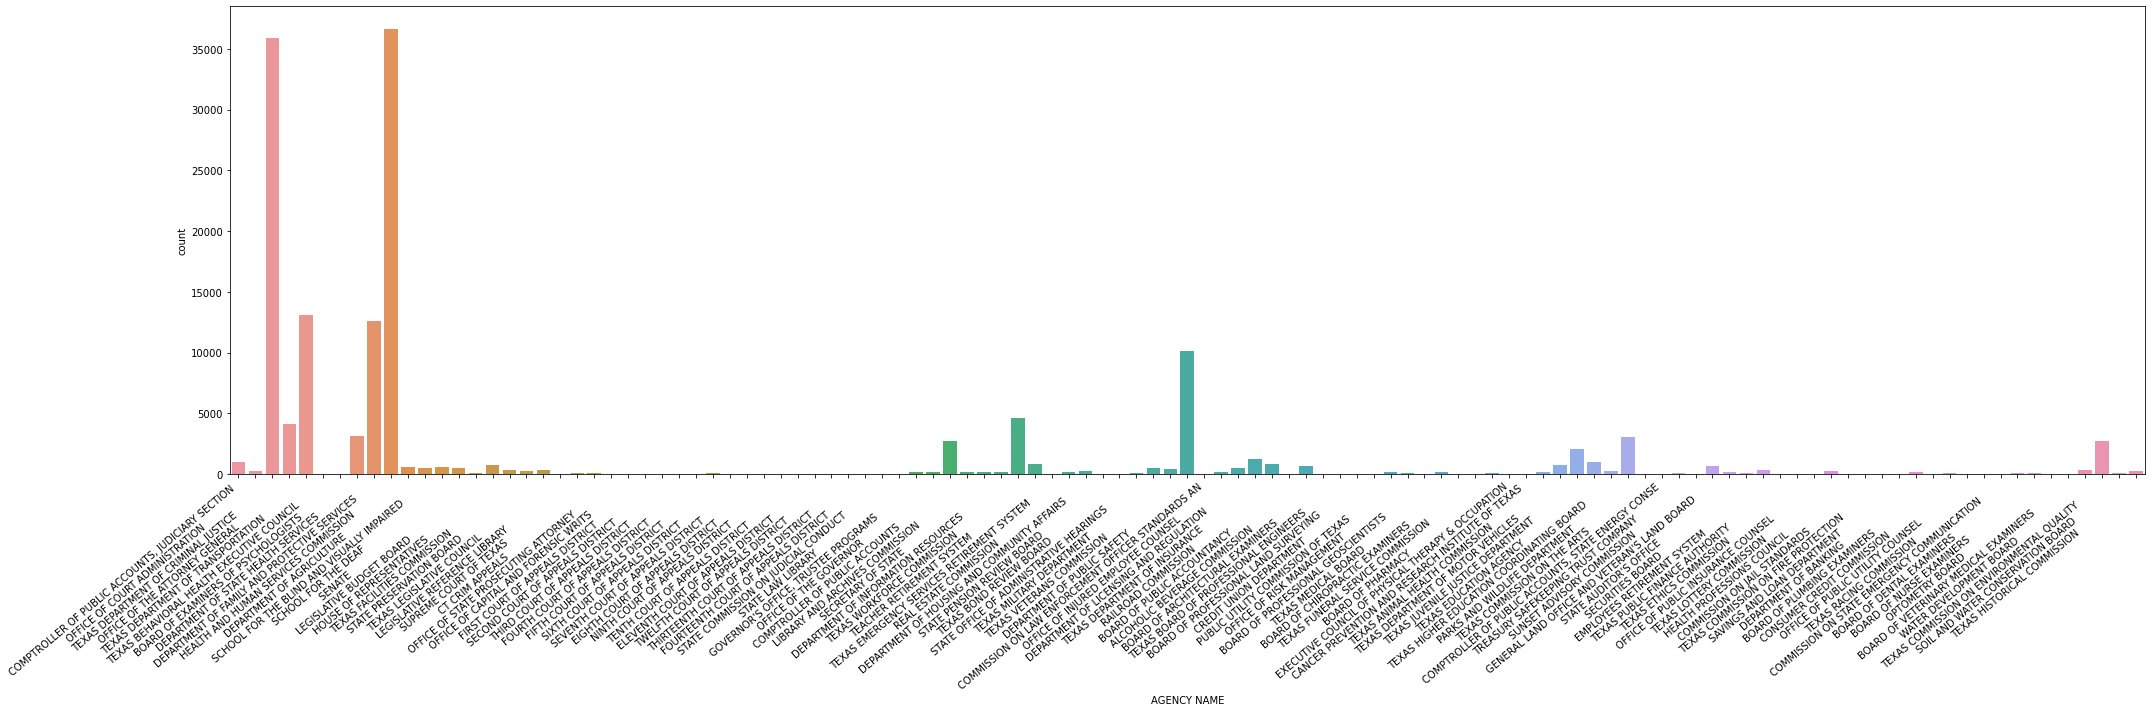

In [16]:
plt.figure(figsize=(30,10)) #, facecolor='gray')
ax=plt.subplot(1,1,1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x='AGENCY NAME', data=txsal_d)
plt.xlabel('AGENCY NAME',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.tight_layout()
##

In [17]:
# there are 2 agency names which has more than 35000 counts, need to check how they correlate with output variable.

### LAST NAME

### FIRST NAME

### MI

<AxesSubplot:xlabel='MI', ylabel='count'>

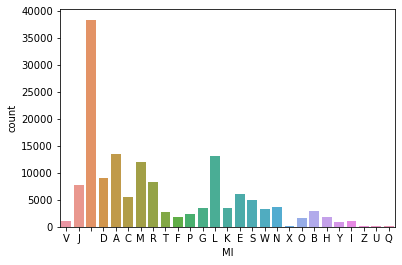

In [18]:
sns.countplot(x='MI', data=txsal_d)

### CLASS CODE

In [19]:
txsal_d['CLASS CODE'].isnull().sum()

0

In [20]:
len(txsal_d['CLASS CODE'].unique())

1481

In [21]:
lst = list(txsal_d['CLASS CODE'].unique())
print(lst)

['JD25    ', '3524    ', '4504    ', '1623    ', '1984    ', 'E178    ', '1323    ', '5023    ', '1322    ', '1014    ', '0154    ', '1574    ', '1324    ', '1553    ', '5002    ', '1575    ', '9323    ', '5203    ', '5205    ', '7354    ', '0152    ', '9324    ', '4412    ', 'HOUR    ', '5201    ', 'S010    ', '7104    ', '7101    ', '7103    ', 'P070    ', '7110    ', 'C160    ', '1570    ', '0156    ', '0520    ', '1960    ', '2742    ', '9045    ', '1650    ', '1571    ', '1621    ', '1600    ', '1588    ', '0243    ', '1561    ', '0150    ', '1584    ', '1914    ', '1602    ', '2740    ', '1915    ', '1625    ', '0312    ', '1604    ', '1624    ', '2741    ', '1823    ', '0244    ', '2268    ', '0132    ', '0130    ', '1016    ', '9056    ', '4423    ', '2135    ', '4315    ', '2105    ', '1154    ', '4426    ', '5102    ', '4324    ', '4300    ', '1100    ', '5407    ', '2101    ', '3144    ', '3257    ', '2305    ', '4525    ', '4422    ', '4611    ', '5401    ', '2120    ', '42

### CLASS TITLE

In [22]:
len(txsal_d['CLASS TITLE'].unique())

1422

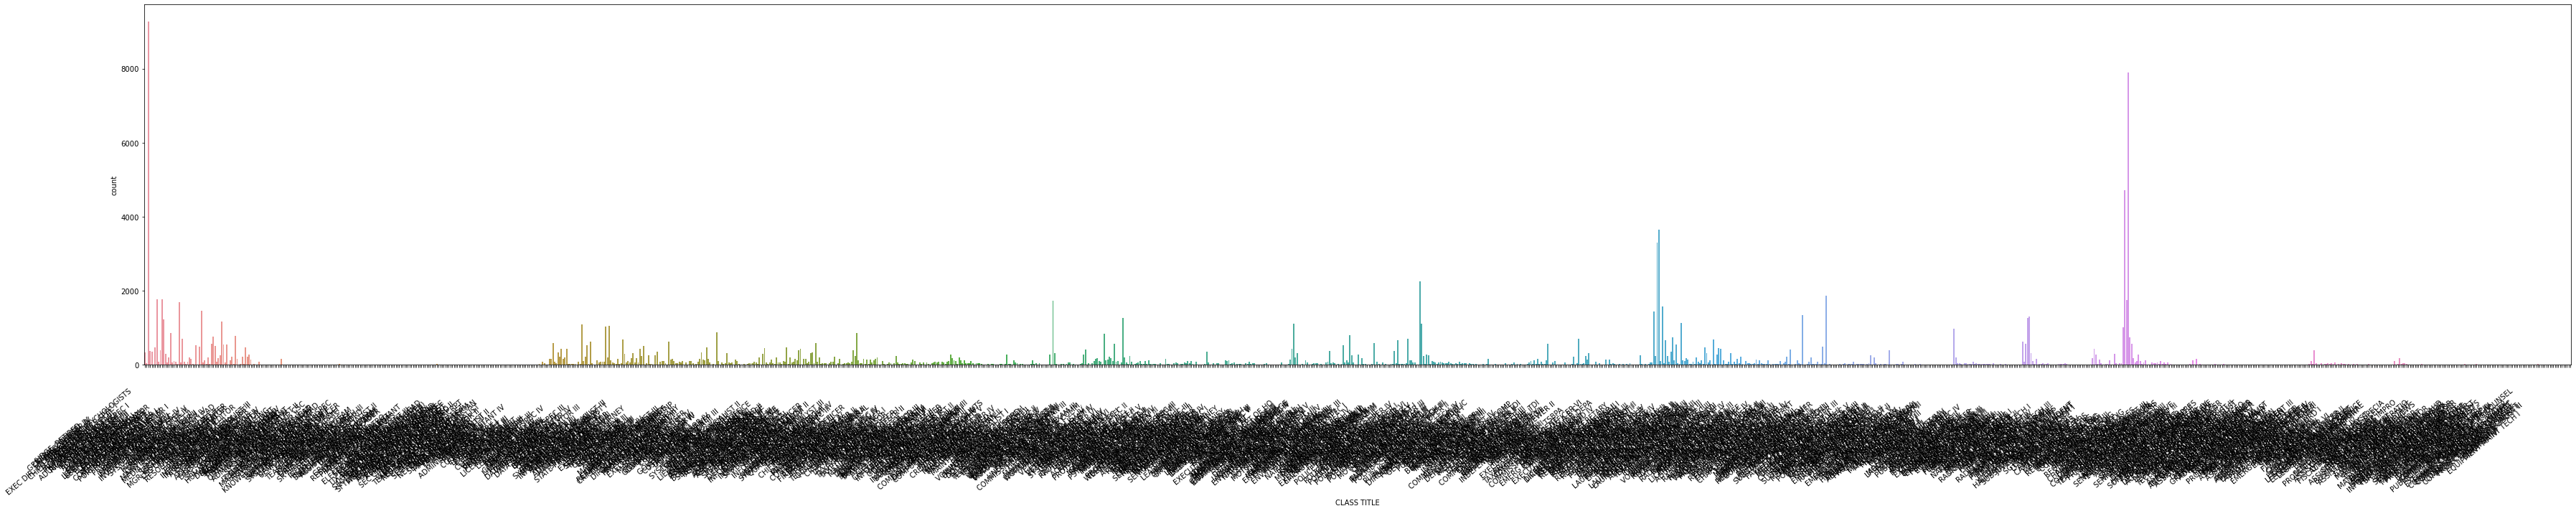

In [23]:
plt.figure(figsize=(50,10)) #, facecolor='gray')
ax=plt.subplot(1,1,1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x='CLASS TITLE', data=txsal_d)
plt.xlabel('CLASS TITLE',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.tight_layout()
##

### ETHNICITY

In [24]:
txsal_d['ETHNICITY']=txsal_d['ETHNICITY'].str.strip()

In [25]:
txsal_d['ETHNICITY'].unique()

array(['WHITE', 'HISPANIC', 'BLACK', 'OTHER', 'AM INDIAN', 'ASIAN'],
      dtype=object)

<AxesSubplot:xlabel='ETHNICITY', ylabel='count'>

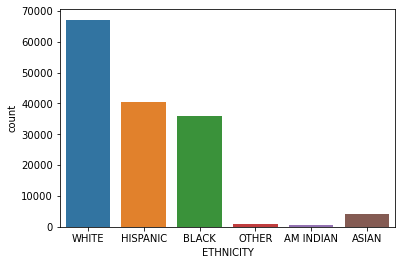

In [26]:
sns.countplot(x='ETHNICITY', data=txsal_d)

In [27]:
txsal_d['ETHNICITY'].value_counts()

WHITE        67142
HISPANIC     40585
BLACK        35853
ASIAN         4268
OTHER          921
AM INDIAN      712
Name: ETHNICITY, dtype: int64

In [28]:
dd = pd.DataFrame
dd=txsal_d.groupby("ETHNICITY")['ETHNICITY'].count()

<AxesSubplot:ylabel='ETHNICITY'>

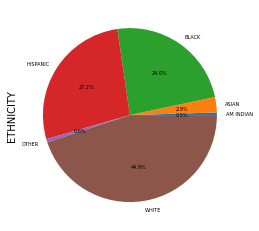

In [29]:
dd.plot.pie(autopct="%.1f%%", fontsize=5)

### GENDER

In [30]:
txsal_d['GENDER']=txsal_d['GENDER'].str.strip()

In [31]:
txsal_d['GENDER'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<AxesSubplot:xlabel='GENDER', ylabel='count'>

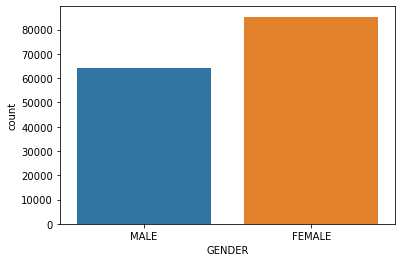

In [32]:
sns.countplot(x='GENDER', data=txsal_d)

In [33]:
dd=txsal_d.groupby("GENDER")['GENDER'].count()

<AxesSubplot:ylabel='GENDER'>

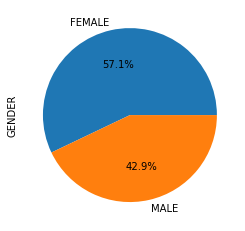

In [34]:
dd.plot.pie(autopct="%.1f%%", )

### STATUS

In [35]:
len(txsal_d['STATUS'].unique())

11

<AxesSubplot:>

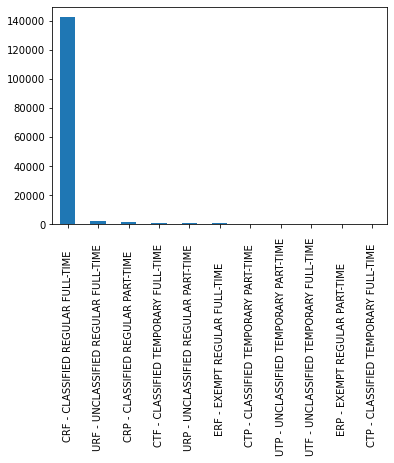

In [36]:
#df['class'].value_counts().plot('bar')
txsal_d['STATUS'].value_counts().plot(kind='bar')

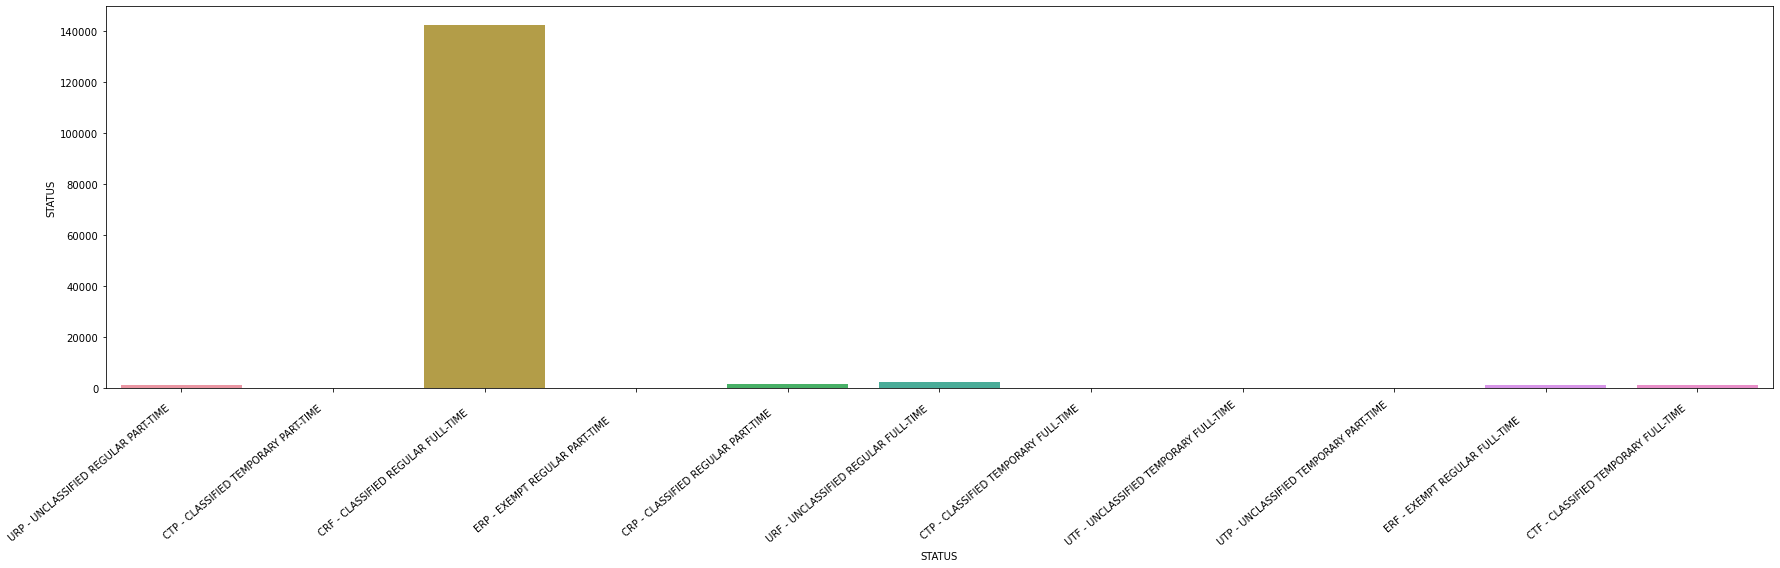

In [37]:
plt.figure(figsize=(25,8)) #, facecolor='gray')
ax=plt.subplot(1,1,1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x='STATUS', data=txsal_d)
plt.xlabel('STATUS',fontsize=10)
plt.ylabel('STATUS',fontsize=10)
plt.tight_layout()

## Monthly

<AxesSubplot:xlabel='MONTHLY', ylabel='Density'>

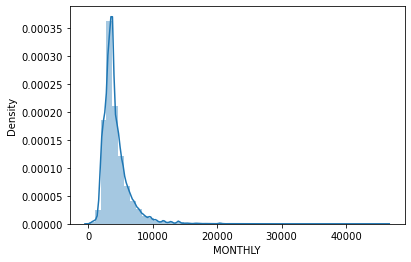

In [38]:
sns.distplot(txsal_d['MONTHLY'])

<AxesSubplot:xlabel='MONTHLY', ylabel='Count'>

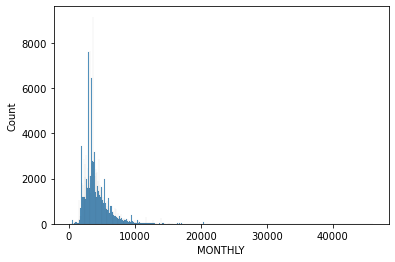

In [39]:
sns.histplot(txsal_d['MONTHLY'])

<AxesSubplot:>

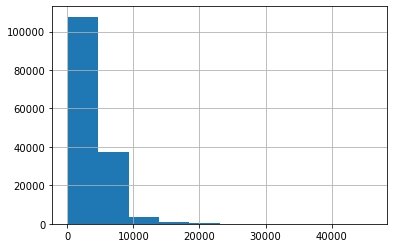

In [40]:
txsal_d['MONTHLY'].hist()

In [41]:
txsal_d['MONTHLY'].max()

46125.0

In [42]:
txsal_d['MONTHLY'].min()

50.0

In [43]:
txsal_d['MONTHLY'].mean()

4226.1842477623895

In [44]:
txsal_d['MONTHLY'].median()

3720.17

In [45]:
txsal_d['MONTHLY'].mode()

0    3720.17
dtype: float64

In [46]:
import statistics
print(statistics.mode(txsal_d['MONTHLY']))

3720.17


### HRLY RATE

In [47]:
txsal_d['HRLY RATE'].isnull().sum()

0

In [48]:
len(txsal_d['HRLY RATE'].unique())

206

<AxesSubplot:>

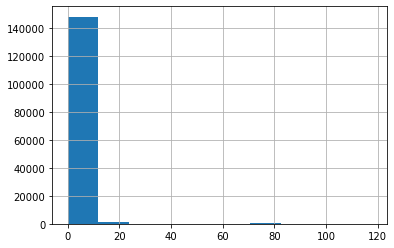

In [49]:
txsal_d['HRLY RATE'].hist() 

<AxesSubplot:xlabel='HRLY RATE', ylabel='Density'>

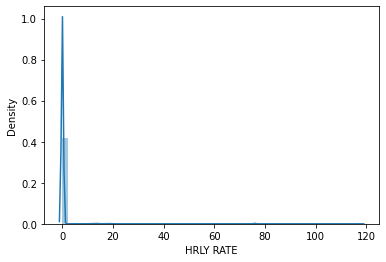

In [50]:
sns.distplot(txsal_d['HRLY RATE'])

In [51]:
len(txsal_d.loc[txsal_d['HRLY RATE']==0])
# dropping rows having hrly rate=0 because if it is 0 in a record and still its salary is present that means 
# its junk value else it should not be zero.

# MONTHLY (SALARY) = HRLY RATE * HOURS PER WEEK -- BUT IN OUR CASE SALALRY SHOULD BE ZERO WHICH IS CURRENTLY NON-ZERO

# feature HRLY RATE  should be dropped

147733

### HRS PER WK

In [52]:
txsal_d['HRS PER WK'].unique()

array([29.  ,  4.  , 40.  , 20.  , 16.  , 19.  ,  7.  , 41.  , 30.  ,
       32.  ,  8.  , 10.  , 50.  , 60.  , 55.  , 70.  , 18.  , 25.  ,
       27.  , 28.  , 11.  , 15.  , 24.  , 26.  , 36.  , 19.2 , 39.6 ,
       29.3 , 26.93,  8.4 , 23.2 ,  5.2 , 22.5 ,  3.35, 35.  ,  4.15,
       12.  ,  5.  , 19.6 , 38.8 , 13.5 , 19.04, 36.25, 36.24, 33.  ,
       31.28, 36.21, 21.76, 30.6 , 13.88, 20.92, 30.4 ,  1.  ,  6.  ,
       14.  , 17.2 , 22.  , 23.  ])

In [53]:
txsal_d['HRS PER WK'].max()

70.0

In [54]:
txsal_d['HRS PER WK'].median()

40.0

In [55]:
txsal_d['HRS PER WK'].mean()

39.71491788254027

In [56]:
statistics.mode(txsal_d['HRS PER WK'])

40.0

In [57]:
txsal_d.loc[txsal_d['HRS PER WK']>40]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
37,101,SENATE ...,BELTRAN,AHITZA,G,7103,LEG. SERVICE/MAINTENANCE ...,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,01/02/19,0.0,41.0,2694.26,32331.12,1164354,True,NaN,True,NaN,NaN
53,101,SENATE ...,KENNY,PAT,,7104,LEGISLATIVE PROFESSIONAL ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,02/03/05,0.0,41.0,4140.18,49682.16,37375,True,NaN,True,NaN,NaN
56,101,SENATE ...,MATEER,TIMOTHY,E,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,04/01/03,0.0,41.0,4098.93,49187.16,51668,True,NaN,True,NaN,NaN
63,101,SENATE ...,ROCHA,MARIE,S,7103,LEG. SERVICE/MAINTENANCE ...,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,05/01/03,0.0,41.0,3365.40,40384.80,152257,True,NaN,True,NaN,NaN
78,101,SENATE ...,WHITE,MARK,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,01/23/04,0.0,41.0,5021.45,60257.40,152770,True,NaN,True,NaN,NaN
80,102,HOUSE OF REPRESENTATIVES ...,CLINE,GREGORY,S,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,01/30/19,0.0,50.0,3000.00,36000.00,531649,True,NaN,True,NaN,NaN
81,102,HOUSE OF REPRESENTATIVES ...,CROW,KORI,M,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,08/31/11,0.0,60.0,922.50,11070.00,194014,True,NaN,True,NaN,NaN
82,102,HOUSE OF REPRESENTATIVES ...,DIAZ,DAVID,A,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,03/01/11,0.0,55.0,2280.59,27367.08,182335,True,NaN,True,NaN,NaN
83,102,HOUSE OF REPRESENTATIVES ...,DUBBERKE,TAMMY,J,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,08/01/13,0.0,60.0,5437.07,65244.84,152904,True,NaN,True,NaN,NaN
84,102,HOUSE OF REPRESENTATIVES ...,DURAND,SAMANTHA,R,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,11/01/19,0.0,50.0,6250.00,75000.00,1055307,True,NaN,True,NaN,NaN


In [58]:
txsal_d['HRS PER WK'].min()

1.0

<AxesSubplot:xlabel='HRS PER WK', ylabel='Density'>

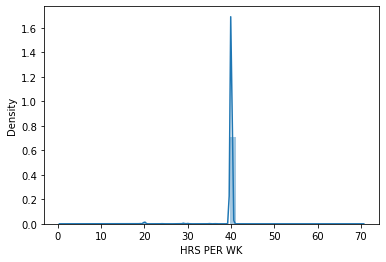

In [59]:
sns.distplot(txsal_d['HRS PER WK'])

<AxesSubplot:>

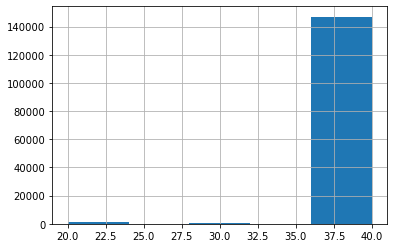

In [60]:
txsal_d['HRS PER WK'].hist(bins = 5, range=[20, 40]) 

### The domain analysis and checks on the data quality, it smells like we will have to work with a sparse dataset which has apprx. >50% of features do not mean anything to the output variable (y). Hence, we will incrementally reduce the features which are redundant ones and/or do not mean anything to output.

## We will see, now, how to reduce the redundant features, unique values and/or sparse data which causes more issues and which also creates bulkness. In fact, it causes even difficulity/impossible to visualize data, process and finally prediction.

In [61]:
## grouping the rows.
txsal_d[['AGENCY','CLASS TITLE','GENDER','ETHNICITY','STATUS','HRS PER WK','MONTHLY']].value_counts()

AGENCY  CLASS TITLE                                         GENDER  ETHNICITY  STATUS                                    HRS PER WK  MONTHLY
696     CORREC  OFFICER V                                   MALE    WHITE      CRF - CLASSIFIED REGULAR FULL-TIME        40.0        3720.17    1709
                                                            FEMALE  BLACK      CRF - CLASSIFIED REGULAR FULL-TIME        40.0        3720.17    1348
        CORREC  OFFICER IV                                  MALE    BLACK      CRF - CLASSIFIED REGULAR FULL-TIME        40.0        3284.27    1283
        CORREC  OFFICER V                                   MALE    BLACK      CRF - CLASSIFIED REGULAR FULL-TIME        40.0        3720.17    1283
        CORREC  OFFICER IV                                  FEMALE  BLACK      CRF - CLASSIFIED REGULAR FULL-TIME        40.0        3284.27    1181
                                                                                                                  

In [62]:
txsal_d['duplicated'].unique()

array([True, nan], dtype=object)

In [63]:
txsal_d['duplicated'].isnull().sum()

149338

In [64]:
txsal_d['multiple_full_time_jobs'].unique()

array([nan,  1.])

In [65]:
txsal_d['multiple_full_time_jobs'].isnull().sum()

149467

In [66]:
txsal_d['combined_multiple_jobs'].unique()

array([nan, True], dtype=object)

In [67]:
txsal_d['combined_multiple_jobs'].isnull().sum()

149384

In [68]:
txsal_d['hide_from_search'].unique()

array([nan, True], dtype=object)

In [69]:
txsal_d['hide_from_search'].isnull().sum()

149465

In [70]:
## Dropping the columns which have maximum nulls
txsal_d.drop(columns=['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs','summed_annual_salary', 'hide_from_search'], axis=1, inplace=True)

In [71]:
txsal_d

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490


In [72]:
## Dropping the columns which do not provide any meaning to the output
txsal_d.drop(columns=['AGENCY NAME','LAST NAME','FIRST NAME','MI','CLASS CODE','HRLY RATE','ANNUAL', 'STATE NUMBER'], axis=1, inplace=True)

In [73]:
txsal_d

,AGENCY,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRS PER WK,MONTHLY
0,241,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,29.0,9545.82
1,212,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,4.0,1404.77
2,241,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,29.0,9545.82
3,212,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,4.0,1404.77
4,696,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,40.0,3284.27
...,...,...,...,...,...,...,...,...
149476,809,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,40.0,2899.00
149477,809,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,40.0,5500.00
149478,809,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,20.0,1120.60
149479,809,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,40.0,5744.16


In [74]:
txsal_d['CLASS TITLE']=txsal_d['CLASS TITLE'].str.strip()

In [75]:
txsal_d['STATUS']=txsal_d['STATUS'].str.strip()

In [76]:
## the dataset
columns = ['AGENCY','CLASS TITLE','GENDER','ETHNICITY','STATUS','HRS PER WK','MONTHLY']
order = [True,True,True,True,True,True,True]
txsal_d.sort_values(by=columns, ascending=order)

,AGENCY,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRS PER WK,MONTHLY
141297,101,ELECTED OFFICIAL,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,12/21/18,40.0,600.0
141747,101,ELECTED OFFICIAL,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,01/13/87,40.0,600.0
141343,101,ELECTED OFFICIAL,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,01/10/17,40.0,600.0
141352,101,ELECTED OFFICIAL,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,01/08/13,40.0,600.0
141484,101,ELECTED OFFICIAL,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,12/29/08,40.0,600.0
...,...,...,...,...,...,...,...,...
141220,930,SYSTEM ANALYST VI,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,02/15/16,40.0,8471.4
141265,930,SYSTEMS ANALYST IV,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,11/01/19,40.0,5000.0
141268,930,SYSTEMS ANALYST VII,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,05/16/16,40.0,10932.0
141269,930,TRADER I,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,11/01/16,40.0,6776.0


## Work arouds for creating Experience (yrs) and also process other features

### EMPLOY DATE

In [77]:
def exp_yrs(days):
    myrs = days/365
    mmms =  round((round(myrs - int(myrs),2))/30,2)
    #return str(int(myrs)) + 'yrs ' + str(int(mmms)) +'months'
    return  int(myrs) + mmms * 10

In [78]:
txsal_d['EMPLOY DATE'].unique()

array(['02/18/88', '02/01/15', '02/01/20', ..., '10/30/18', '06/09/05',
       '09/22/89'], dtype=object)

In [79]:
### Adding Experience feature to the data
txsal_d['exp_yrs']=''

In [80]:
from datetime import date, timedelta
import datetime as dt

In [81]:
#2/18/1988 --- month, day, year
#dt1 = dt1-timedelta(days=52)
dt1 = dt.datetime(1989,9,22) #    88,2,18) 

dt_now = dt.datetime.now()

dys = dt_now - dt1

#dys.days

#print(dt1)
print(dt_now, '&', dt1,'=',dys)
print('exp yrs' ,exp_yrs(dys.days))

2021-09-16 11:38:09.917415 & 1989-09-22 00:00:00 = 11682 days, 11:38:09.917415
exp yrs 32.0


In [82]:
# & == and
p = 0
for i in txsal_d['EMPLOY DATE']:
        sp = i.split('/')
        sfx = 1900 if int(sp[2]) >= 50 and int(sp[2]) <= 99 else 2000
        dt1 = dt.datetime(sfx+int(sp[2]), int(sp[0]), int(sp[1]))
        dys = dt.datetime.now() -  dt1
        txsal_d['exp_yrs'][p] = exp_yrs(dys.days)
        p += 1
print(p)
#txsal_d['exp_in_yrs'] #.isnull().sum()

149481


In [83]:
txsal_d.tail(2)

,AGENCY,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRS PER WK,MONTHLY,exp_yrs
149479,809,PROGRAM SPECIALIST III,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,40.0,5744.16,32
149480,809,CUSTOMER SERVICE REP I,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,20.0,1017.46,9.2


In [84]:
## drop the employ date
txsal_d.drop(columns=['EMPLOY DATE'], axis=1, inplace=True)

In [85]:
txsal_d = txsal_d.drop_duplicates()

In [86]:
txsal_d

,AGENCY,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRS PER WK,MONTHLY,exp_yrs
0,241,"JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,29.0,9545.82,33.2
1,212,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,4.0,1404.77,6.2
2,241,"JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,29.0,9545.82,1.2
3,212,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,4.0,1404.77,3
4,696,CORREC OFFICER IV,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,3284.27,1.1
...,...,...,...,...,...,...,...,...
149476,809,SECURITY OFFICER III,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,2899.00,3.3
149477,809,WEB ADMINISTRATOR III,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,5500.00,6.1
149478,809,CUSTOMER SERVICE REP I,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,20.0,1120.60,8.3
149479,809,PROGRAM SPECIALIST III,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,5744.16,32


In [87]:
## Encode class title
txsal_d['class_title_encoded']=''

In [88]:
class_title=txsal_d['CLASS TITLE'].unique()

In [89]:
c=0
for i in class_title:
    c += 1
    txsal_d['class_title_encoded']= np.where(txsal_d['CLASS TITLE']==i,c,txsal_d['class_title_encoded'])
    #print(i + ' -- Encoded!')

In [90]:
txsal_d['status_encoded']=''

In [91]:
lst_status = list(txsal_d['STATUS'].str.split('-'))

In [92]:
## encode status
i=0
max_shape = int(txsal_d['STATUS'].shape[0])-1
lst1_status = list()
while i <= max_shape:
    lst1_status.append(lst_status[i][0])
    i = i + 1
print(i)

97108


In [93]:
txsal_d['status_id']=lst1_status

In [94]:
status = txsal_d['status_id'].unique()

In [95]:
c=0
for i in status:
    c += 1
    txsal_d['status_encoded']= np.where(txsal_d['status_id']==i,c,txsal_d['status_encoded'])
    print(i + ' -- encoded!') 

URP  -- encoded!
CTP  -- encoded!
CRF  -- encoded!
ERP  -- encoded!
CRP  -- encoded!
URF  -- encoded!
UTF  -- encoded!
UTP  -- encoded!
ERF  -- encoded!
CTF  -- encoded!


In [96]:
txsal_d[['STATUS','status_id','status_encoded']]

,STATUS,status_id,status_encoded
0,URP - UNCLASSIFIED REGULAR PART-TIME,URP,1
1,CTP - CLASSIFIED TEMPORARY PART-TIME,CTP,2
2,URP - UNCLASSIFIED REGULAR PART-TIME,URP,1
3,CTP - CLASSIFIED TEMPORARY PART-TIME,CTP,2
4,CRF - CLASSIFIED REGULAR FULL-TIME,CRF,3
...,...,...,...
149476,CRF - CLASSIFIED REGULAR FULL-TIME,CRF,3
149477,CRF - CLASSIFIED REGULAR FULL-TIME,CRF,3
149478,CRP - CLASSIFIED REGULAR PART-TIME,CRP,5
149479,CRF - CLASSIFIED REGULAR FULL-TIME,CRF,3


In [97]:
txsal_d.tail(2)

,AGENCY,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded,status_id
149479,809,PROGRAM SPECIALIST III,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,5744.16,32,257,3,CRF
149480,809,CUSTOMER SERVICE REP I,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,20.0,1017.46,9.2,61,5,CRP


In [98]:
txsal_d.drop(columns=['CLASS TITLE','STATUS','status_id'], axis=1, inplace=True)

In [99]:
txsal_d

,AGENCY,ETHNICITY,GENDER,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded
0,241,WHITE,MALE,29.0,9545.82,33.2,1,1
1,212,WHITE,MALE,4.0,1404.77,6.2,2,2
2,241,WHITE,MALE,29.0,9545.82,1.2,1,1
3,212,WHITE,MALE,4.0,1404.77,3,2,2
4,696,HISPANIC,FEMALE,40.0,3284.27,1.1,3,3
...,...,...,...,...,...,...,...,...
149476,809,WHITE,MALE,40.0,2899.00,3.3,416,3
149477,809,WHITE,FEMALE,40.0,5500.00,6.1,445,3
149478,809,WHITE,MALE,20.0,1120.60,8.3,61,5
149479,809,WHITE,MALE,40.0,5744.16,32,257,3


In [100]:
txsal_d = txsal_d.drop_duplicates()

In [101]:
txsal_d

,AGENCY,ETHNICITY,GENDER,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded
0,241,WHITE,MALE,29.0,9545.82,33.2,1,1
1,212,WHITE,MALE,4.0,1404.77,6.2,2,2
2,241,WHITE,MALE,29.0,9545.82,1.2,1,1
3,212,WHITE,MALE,4.0,1404.77,3,2,2
4,696,HISPANIC,FEMALE,40.0,3284.27,1.1,3,3
...,...,...,...,...,...,...,...,...
149476,809,WHITE,MALE,40.0,2899.00,3.3,416,3
149477,809,WHITE,FEMALE,40.0,5500.00,6.1,445,3
149478,809,WHITE,MALE,20.0,1120.60,8.3,61,5
149479,809,WHITE,MALE,40.0,5744.16,32,257,3


In [102]:
pd.set_option('display.max_columns', None)

In [103]:
txsal_d.AGENCY.value_counts()

529    24692
601    11861
696    10684
530     8048
405     4974
       ...  
364        7
481        5
464        4
213        4
510        1
Name: AGENCY, Length: 113, dtype: int64

In [104]:
txsal_d.shape

(97108, 8)

In [105]:
txsal_d

,AGENCY,ETHNICITY,GENDER,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded
0,241,WHITE,MALE,29.0,9545.82,33.2,1,1
1,212,WHITE,MALE,4.0,1404.77,6.2,2,2
2,241,WHITE,MALE,29.0,9545.82,1.2,1,1
3,212,WHITE,MALE,4.0,1404.77,3,2,2
4,696,HISPANIC,FEMALE,40.0,3284.27,1.1,3,3
...,...,...,...,...,...,...,...,...
149476,809,WHITE,MALE,40.0,2899.00,3.3,416,3
149477,809,WHITE,FEMALE,40.0,5500.00,6.1,445,3
149478,809,WHITE,MALE,20.0,1120.60,8.3,61,5
149479,809,WHITE,MALE,40.0,5744.16,32,257,3


In [106]:
txsal_d.head(2)

,AGENCY,ETHNICITY,GENDER,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded
0,241,WHITE,MALE,29.0,9545.82,33.2,1,1
1,212,WHITE,MALE,4.0,1404.77,6.2,2,2


In [107]:
txsal_d.tail(2)

,AGENCY,ETHNICITY,GENDER,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded
149479,809,WHITE,MALE,40.0,5744.16,32,257,3
149480,809,WHITE,FEMALE,20.0,1017.46,9.2,61,5


In [108]:
txsal_d['AGENCY']

0         241
1         212
2         241
3         212
4         696
         ... 
149476    809
149477    809
149478    809
149479    809
149480    809
Name: AGENCY, Length: 97108, dtype: int64

In [109]:
txsal_d.describe()

,AGENCY,HRS PER WK,MONTHLY
count,97108.000000,97108.000000,97108.000000
mean,519.969302,39.675885,4604.231510
std,140.898340,2.498236,2264.457766
min,101.000000,1.000000,50.000000
25%,454.000000,40.000000,3175.665000
50%,529.000000,40.000000,4101.500000
75%,601.000000,40.000000,5402.910000
max,930.000000,70.000000,46125.000000


In [110]:
txsal_d.isnull().sum()

AGENCY                 0
ETHNICITY              0
GENDER                 0
HRS PER WK             0
MONTHLY                0
exp_yrs                0
class_title_encoded    0
status_encoded         0
dtype: int64

In [111]:
txsal_d.shape

(97108, 8)

In [112]:
txsal_d.head()

,AGENCY,ETHNICITY,GENDER,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded
0,241,WHITE,MALE,29.0,9545.82,33.2,1,1
1,212,WHITE,MALE,4.0,1404.77,6.2,2,2
2,241,WHITE,MALE,29.0,9545.82,1.2,1,1
3,212,WHITE,MALE,4.0,1404.77,3,2,2
4,696,HISPANIC,FEMALE,40.0,3284.27,1.1,3,3


In [113]:
# Features (i.e., duplicated, multiple_full_time_jobs, combined_multiple_jobs, summed_annual_salary, hide_from_search)
# which have 99% Null values will be dropped at the first instance itself as it is difficult analyse them as well as
# not advisable to impute them.

In [114]:
txsal_d.shape

(97108, 8)

## Univariate Analysis


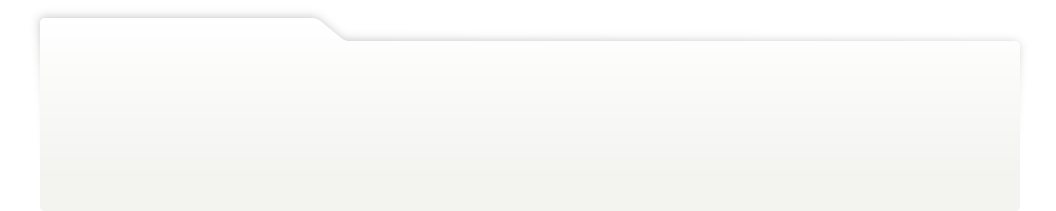
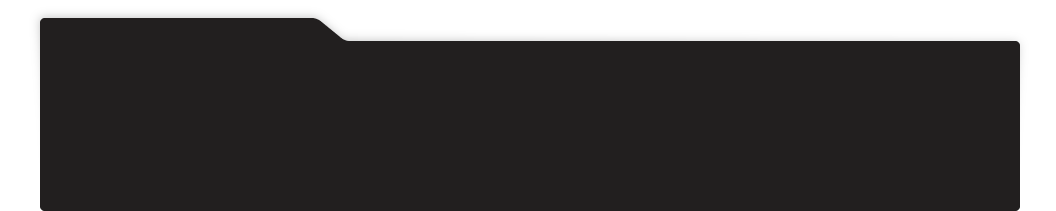
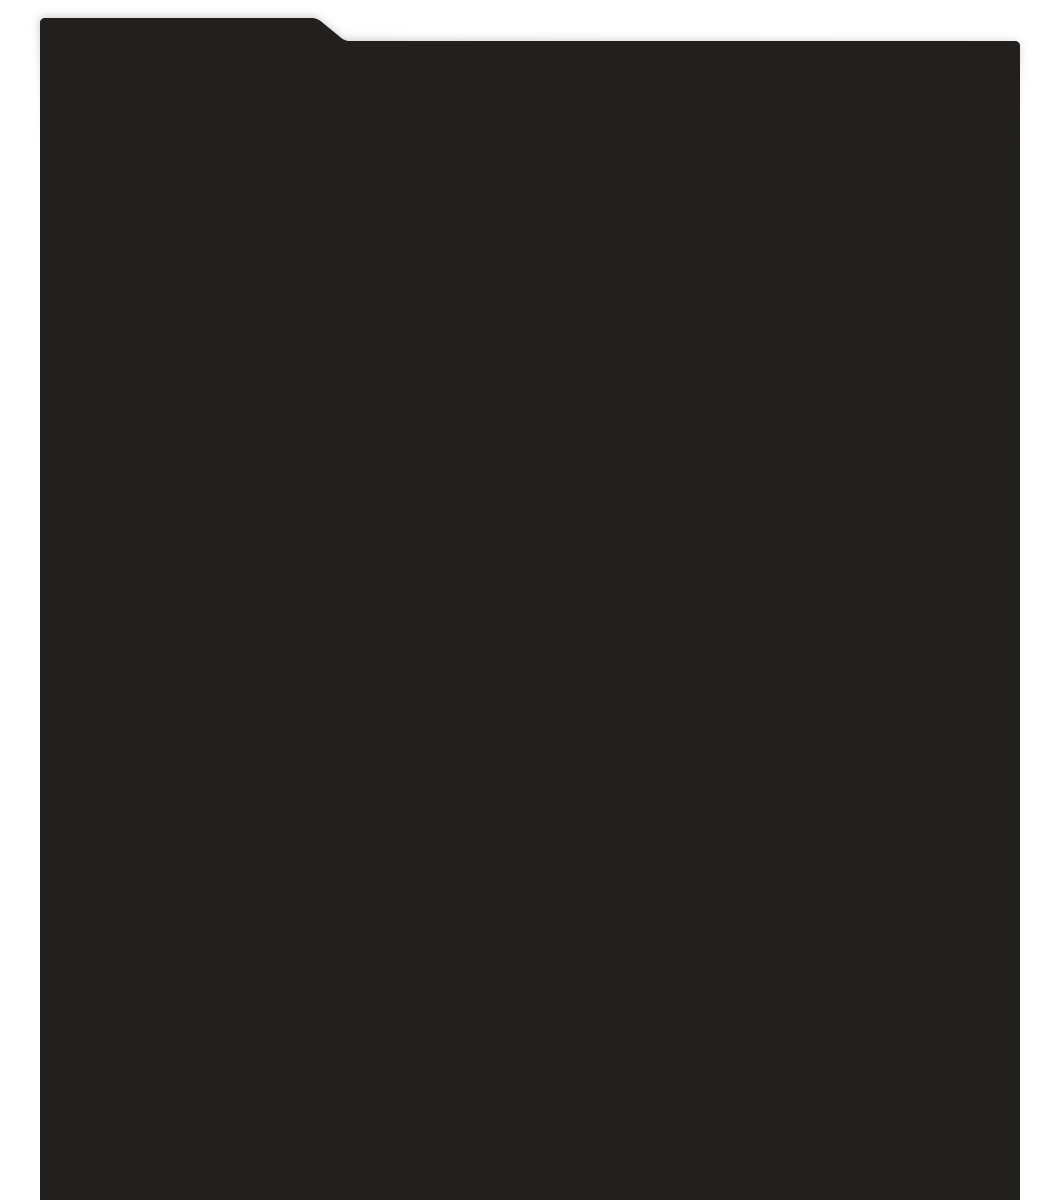
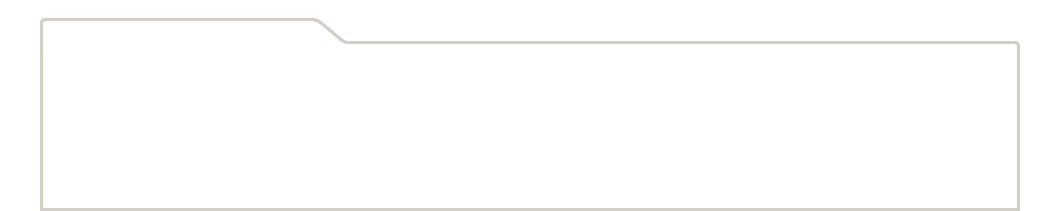
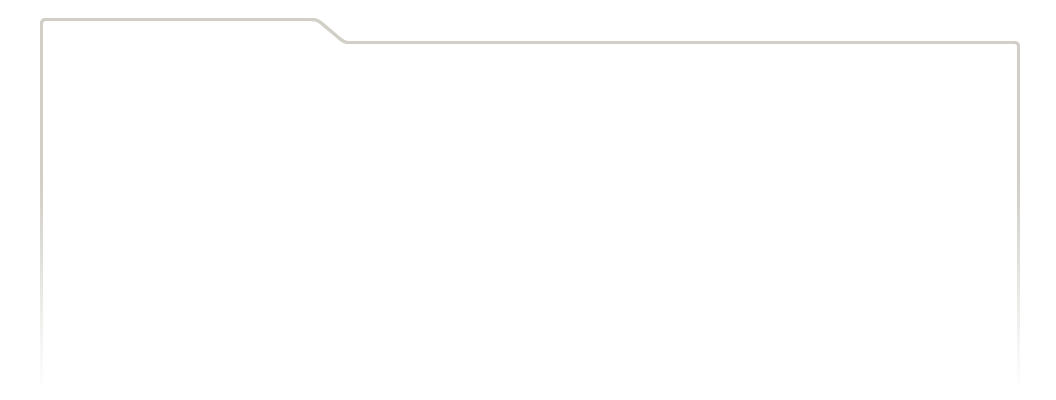
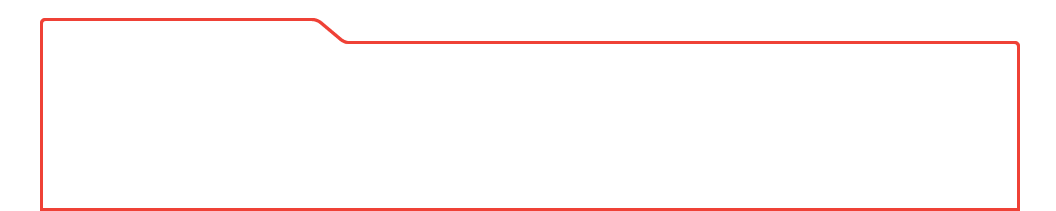
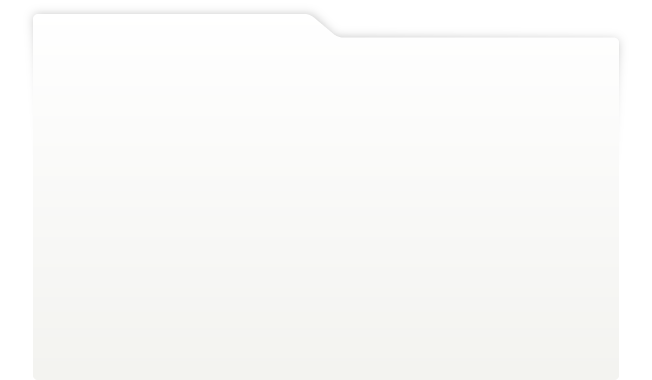
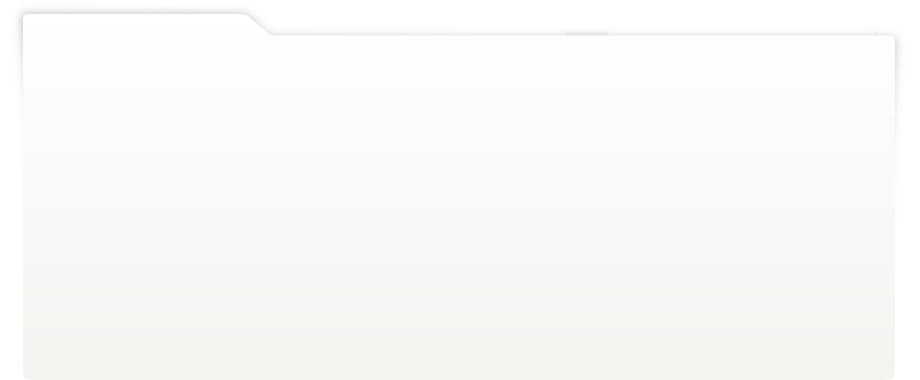
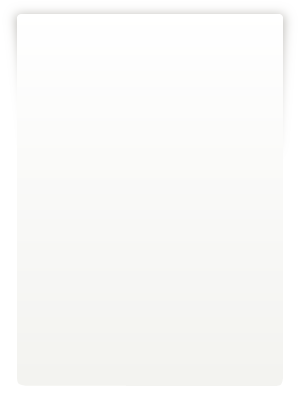
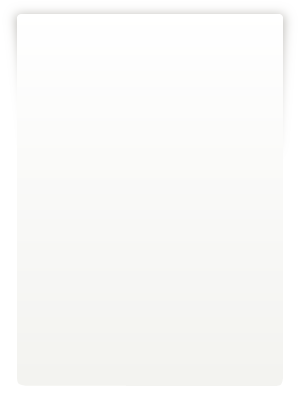
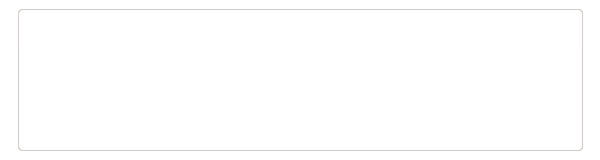
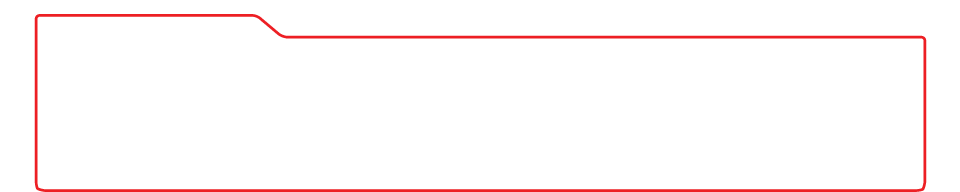
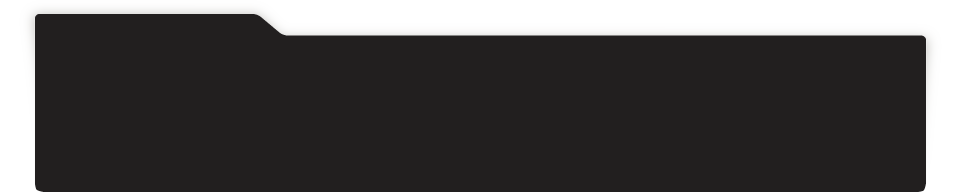
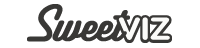
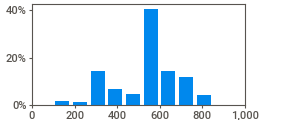
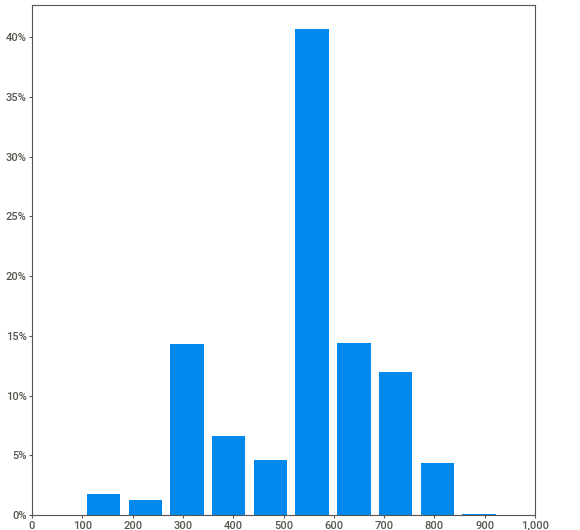
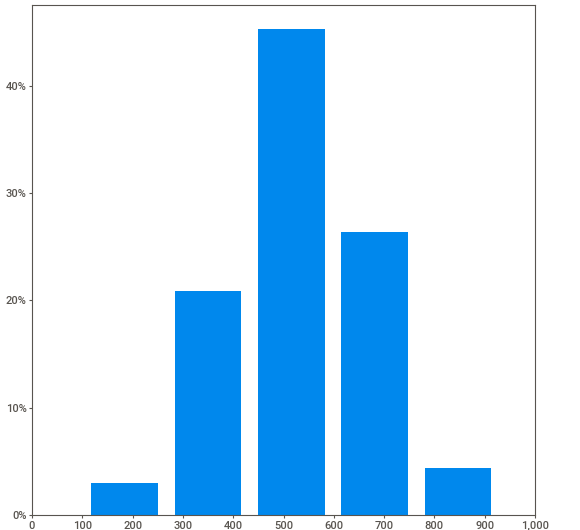
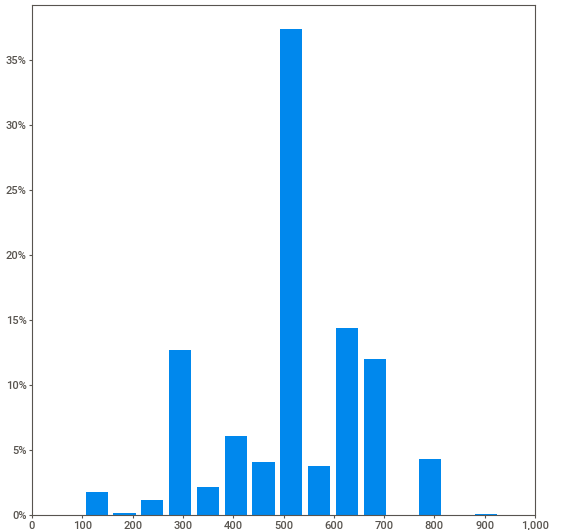
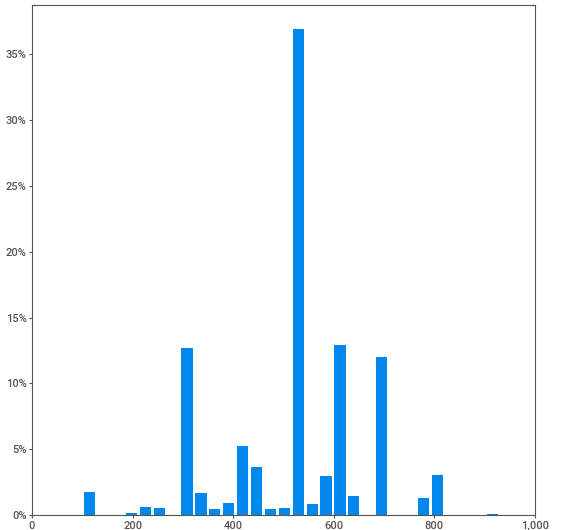
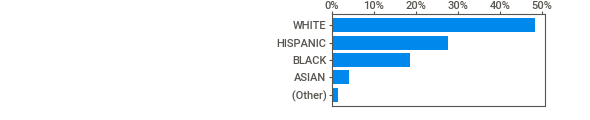
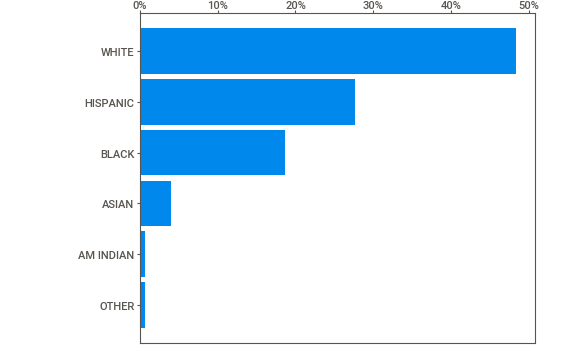
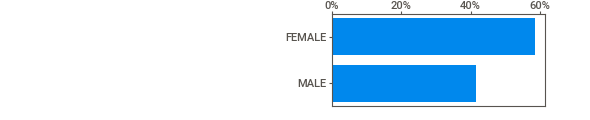
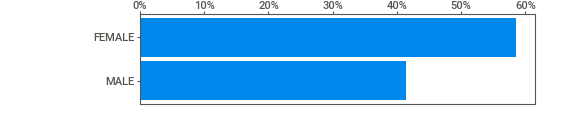
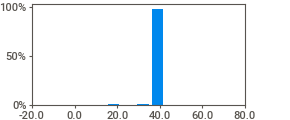
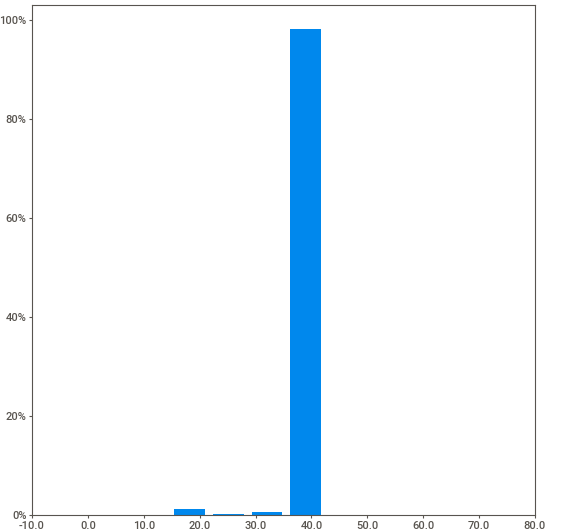
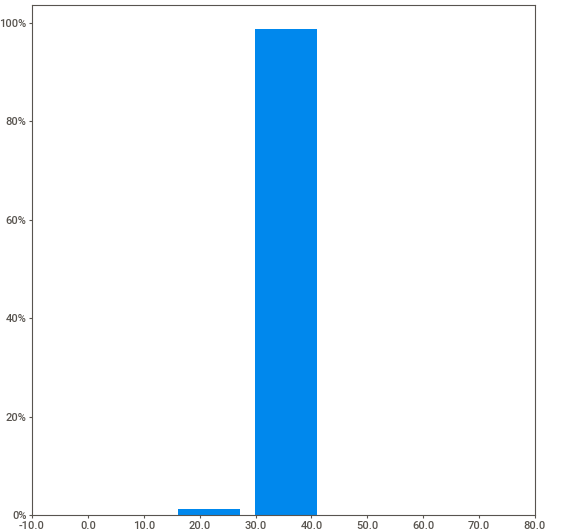
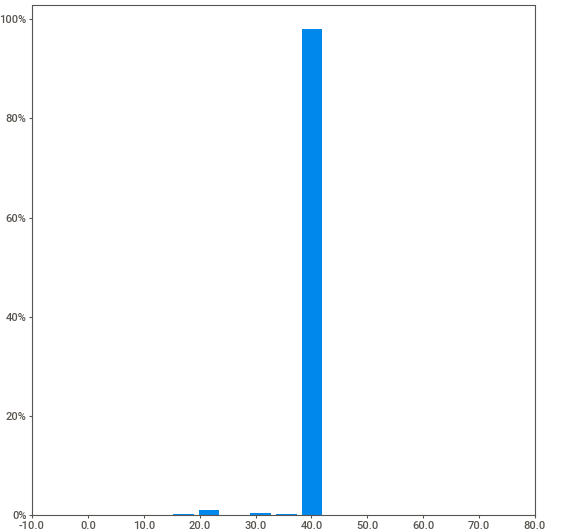
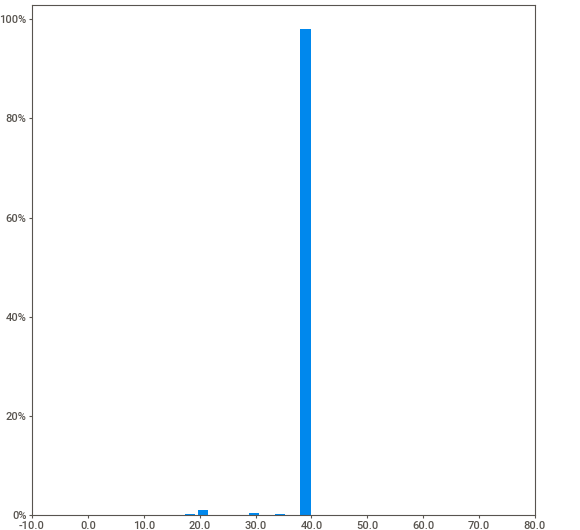
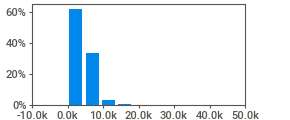
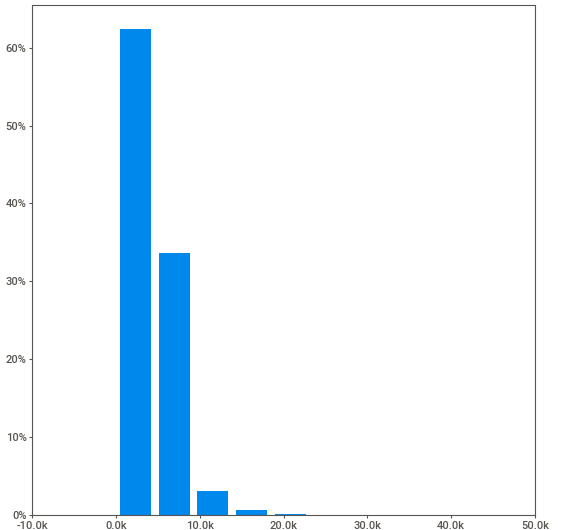
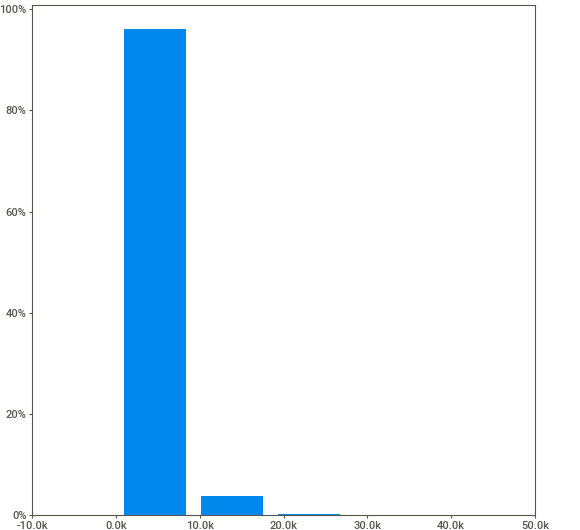
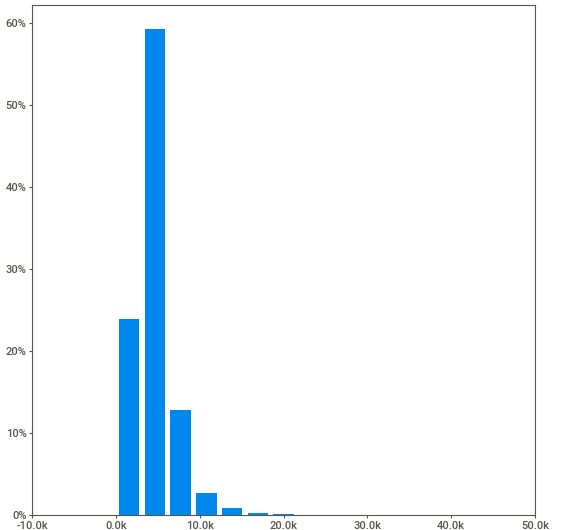
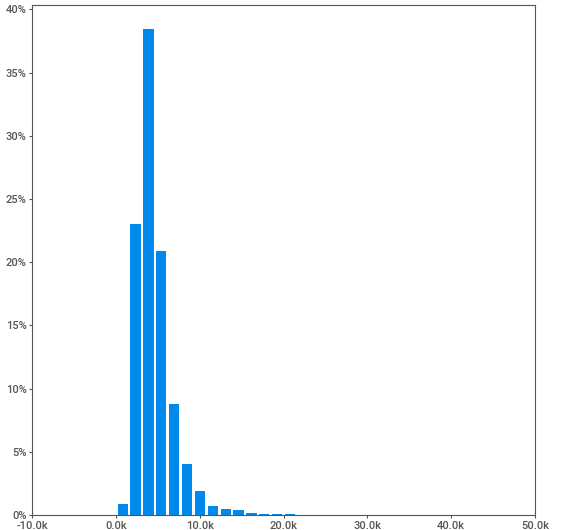
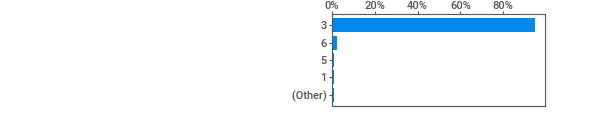
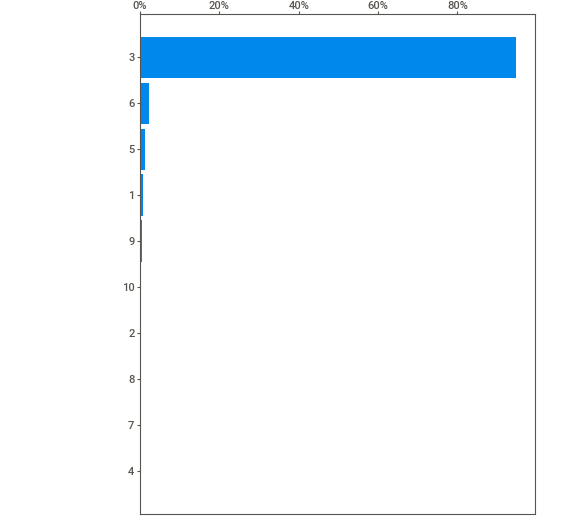
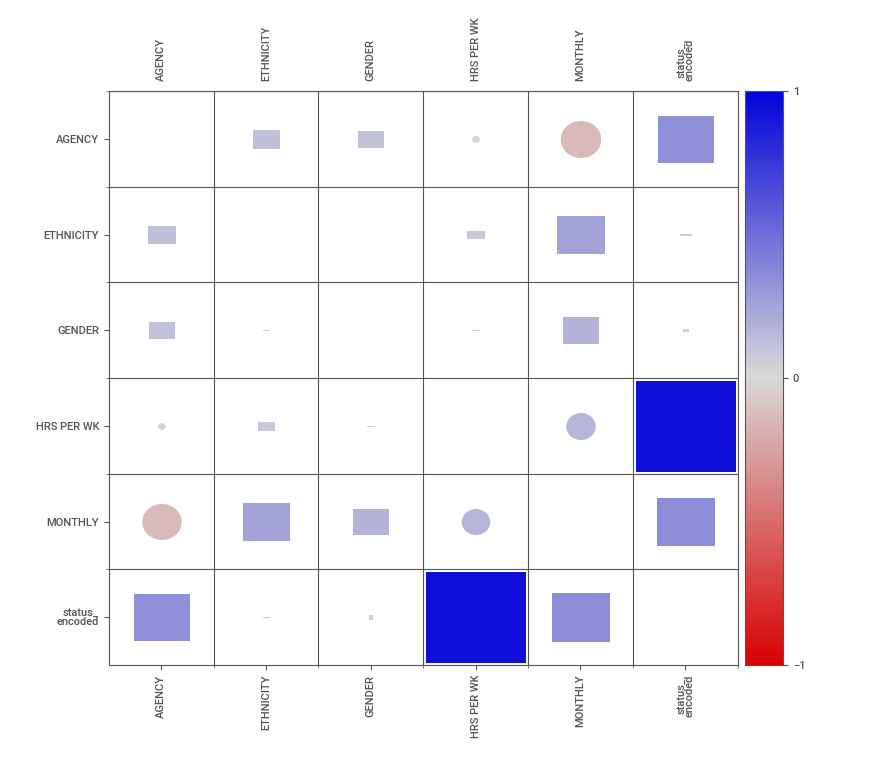
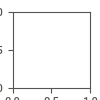

In [115]:
# Glancing thru sweetviz charts if any analysis is possible !?
import sweetviz as sv
my_report=sv.analyze(txsal_d)
my_report.show_notebook()

### Lets see the features again after reducing rows

## Monthly

<AxesSubplot:xlabel='MONTHLY', ylabel='Count'>

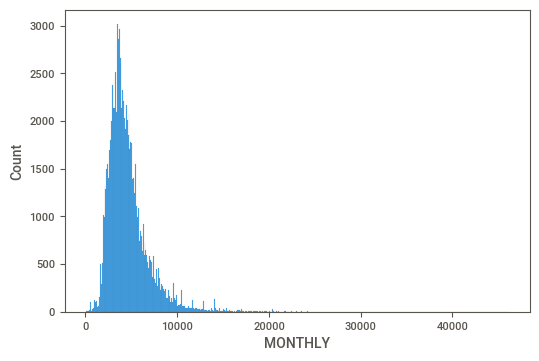

In [116]:
sns.histplot(txsal_d['MONTHLY'])

<AxesSubplot:xlabel='MONTHLY', ylabel='Density'>

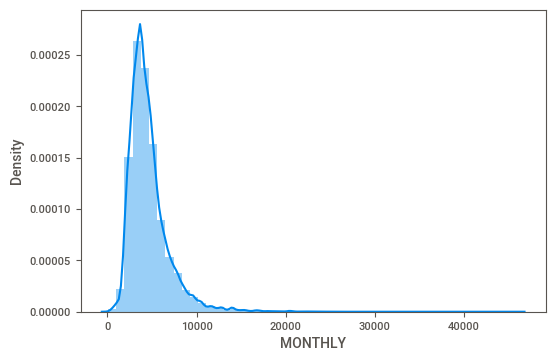

In [117]:
sns.distplot(txsal_d['MONTHLY'])

### HRS PER WK

<AxesSubplot:xlabel='HRS PER WK', ylabel='Density'>

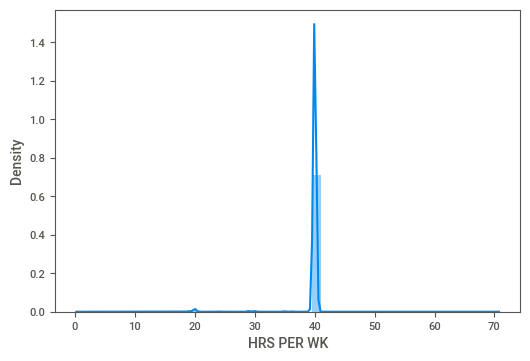

In [118]:
sns.distplot(txsal_d['HRS PER WK'])

### Experience

In [119]:
## may be added here as it plays a very important role in deciding salary 

<AxesSubplot:xlabel='exp_yrs', ylabel='Density'>

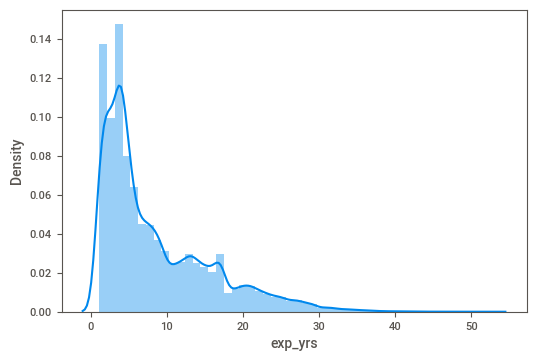

In [120]:
sns.distplot(txsal_d['exp_yrs'])

<AxesSubplot:xlabel='exp_yrs', ylabel='Count'>

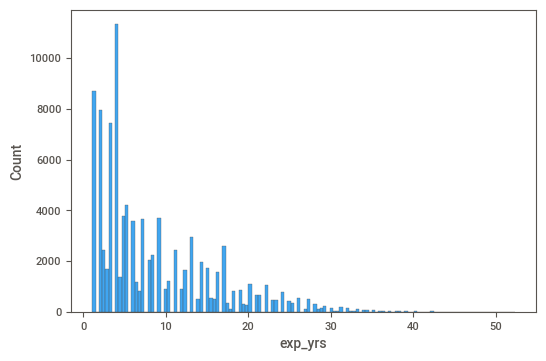

In [121]:
sns.histplot(txsal_d['exp_yrs'])

## Insights - Univariate

#Based on the insights above:

#We have the following

1. Stripe spaces in the CLASS TITLE and encode it.
2. Add a feature - Exp_yrs
3. Ethnicity - encode
4. Gender - encode
5. Status - split & encode


In [122]:
# Encode ageny name

In [123]:
#txsal_d['agency_name_encoded']=''

In [124]:
#agency_name = txsal_d['AGENCY NAME'].unique()

In [125]:
#c=0
#for i in agency_name:
    #c += 1
    #txsal_d['agency_name_encoded']= np.where(txsal_d['AGENCY NAME']==i,c,txsal_d['agency_name_encoded'])
    #print(i + ' -- Encoded!') 

In [126]:
# agency and agency name have same value to keep.so we can go for agency.

### ETHNICITY - encoding

In [127]:
txsal_d['ETHNICITY'].unique()

array(['WHITE', 'HISPANIC', 'BLACK', 'OTHER', 'AM INDIAN', 'ASIAN'],
      dtype=object)

In [128]:
txsal_d['ETHNICITY']=txsal_d['ETHNICITY'].str.strip()

In [129]:
txsal_d['ethnicity_encoded']=''

In [130]:
txsal_d.ethnicity_encoded=txsal_d.ETHNICITY.map({'WHITE':1, 'HISPANIC':2, 'BLACK':3, 'OTHER':4, 'AM INDIAN':5, 'ASIAN':6})

### GENDER

In [131]:
txsal_d['GENDER'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [132]:
txsal_d['GENDER']=txsal_d['GENDER'].str.strip()

In [133]:
txsal_d['gender_encoded']=''

In [134]:
txsal_d.gender_encoded=txsal_d.GENDER.map({'MALE':1, 'FEMALE':0})

In [135]:
txsal_d.tail(2)

,AGENCY,ETHNICITY,GENDER,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded,ethnicity_encoded,gender_encoded
149479,809,WHITE,MALE,40.0,5744.16,32,257,3,1,1
149480,809,WHITE,FEMALE,20.0,1017.46,9.2,61,5,1,0


## Now that all encoding are over, drop the features

In [136]:
txsal_d.tail(2)

,AGENCY,ETHNICITY,GENDER,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded,ethnicity_encoded,gender_encoded
149479,809,WHITE,MALE,40.0,5744.16,32,257,3,1,1
149480,809,WHITE,FEMALE,20.0,1017.46,9.2,61,5,1,0


In [137]:
txsal_d

,AGENCY,ETHNICITY,GENDER,HRS PER WK,MONTHLY,exp_yrs,class_title_encoded,status_encoded,ethnicity_encoded,gender_encoded
0,241,WHITE,MALE,29.0,9545.82,33.2,1,1,1,1
1,212,WHITE,MALE,4.0,1404.77,6.2,2,2,1,1
2,241,WHITE,MALE,29.0,9545.82,1.2,1,1,1,1
3,212,WHITE,MALE,4.0,1404.77,3,2,2,1,1
4,696,HISPANIC,FEMALE,40.0,3284.27,1.1,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...
149476,809,WHITE,MALE,40.0,2899.00,3.3,416,3,1,1
149477,809,WHITE,FEMALE,40.0,5500.00,6.1,445,3,1,0
149478,809,WHITE,MALE,20.0,1120.60,8.3,61,5,1,1
149479,809,WHITE,MALE,40.0,5744.16,32,257,3,1,1


In [138]:
txsal_d['salary'] = txsal_d['MONTHLY']

In [139]:
txsal_d.rename(columns={'AGENCY':'agency','HRS PER WK':'hrs_per_wk'}, inplace=True )

In [140]:
#txsal_d.drop(columns=['ETHNICITY','GENDER','MONTHLY'], axis=1, inplace=True)     
txsal_d.drop(columns=['MONTHLY'], axis=1, inplace=True)  

In [141]:
txsal_d = txsal_d.drop_duplicates()

In [142]:
txsal_d.shape

(97108, 10)

### Drop unnecessary columns (by uncommenting below)

In [143]:
txsal_d.tail(2)

,agency,ETHNICITY,GENDER,hrs_per_wk,exp_yrs,class_title_encoded,status_encoded,ethnicity_encoded,gender_encoded,salary
149479,809,WHITE,MALE,40.0,32,257,3,1,1,5744.16
149480,809,WHITE,FEMALE,20.0,9.2,61,5,1,0,1017.46


In [144]:
#txsal_d=txsal_d.loc[txsal_d['hrly_rate']>0] 
# dropping rows having hrly rate=0 because if it is 0 and still its salary is present that means its 
#junk value.

In [145]:
txsal_d.columns

Index(['agency', 'ETHNICITY', 'GENDER', 'hrs_per_wk', 'exp_yrs',
       'class_title_encoded', 'status_encoded', 'ethnicity_encoded',
       'gender_encoded', 'salary'],
      dtype='object')

In [146]:
txsal_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97108 entries, 0 to 149480
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   agency               97108 non-null  int64  
 1   ETHNICITY            97108 non-null  object 
 2   GENDER               97108 non-null  object 
 3   hrs_per_wk           97108 non-null  float64
 4   exp_yrs              97108 non-null  object 
 5   class_title_encoded  97108 non-null  object 
 6   status_encoded       97108 non-null  object 
 7   ethnicity_encoded    97108 non-null  int64  
 8   gender_encoded       97108 non-null  int64  
 9   salary               97108 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 8.1+ MB


### Downsize the features

In [147]:
import numpy as np
#txsal_d['hrly_rate'] = txsal_d['hrly_rate'].astype(np.float32)

In [148]:
txsal_d['hrs_per_wk'] = txsal_d['hrs_per_wk'].astype(np.float32)

In [149]:
txsal_d['salary'] = txsal_d['salary'].astype(np.float32)

In [150]:
txsal_d['exp_yrs'] = txsal_d['exp_yrs'].astype(np.int32)

In [151]:
txsal_d['class_title_encoded'] = txsal_d['class_title_encoded'].astype(np.int32)

In [152]:
txsal_d['ethnicity_encoded'] = txsal_d['ethnicity_encoded'].astype(np.int32)

In [153]:
txsal_d['gender_encoded'] = txsal_d['gender_encoded'].astype(np.int32)

In [154]:
txsal_d['status_encoded'] = txsal_d['status_encoded'].astype(np.int32)

In [155]:
txsal_d.shape

(97108, 10)

## Bivariate and Multivariate Analysis

### MONTHLY

<AxesSubplot:xlabel='salary', ylabel='Density'>

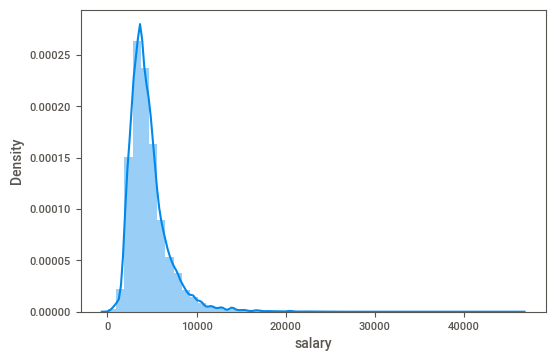

In [156]:
sns.distplot(txsal_d.salary)

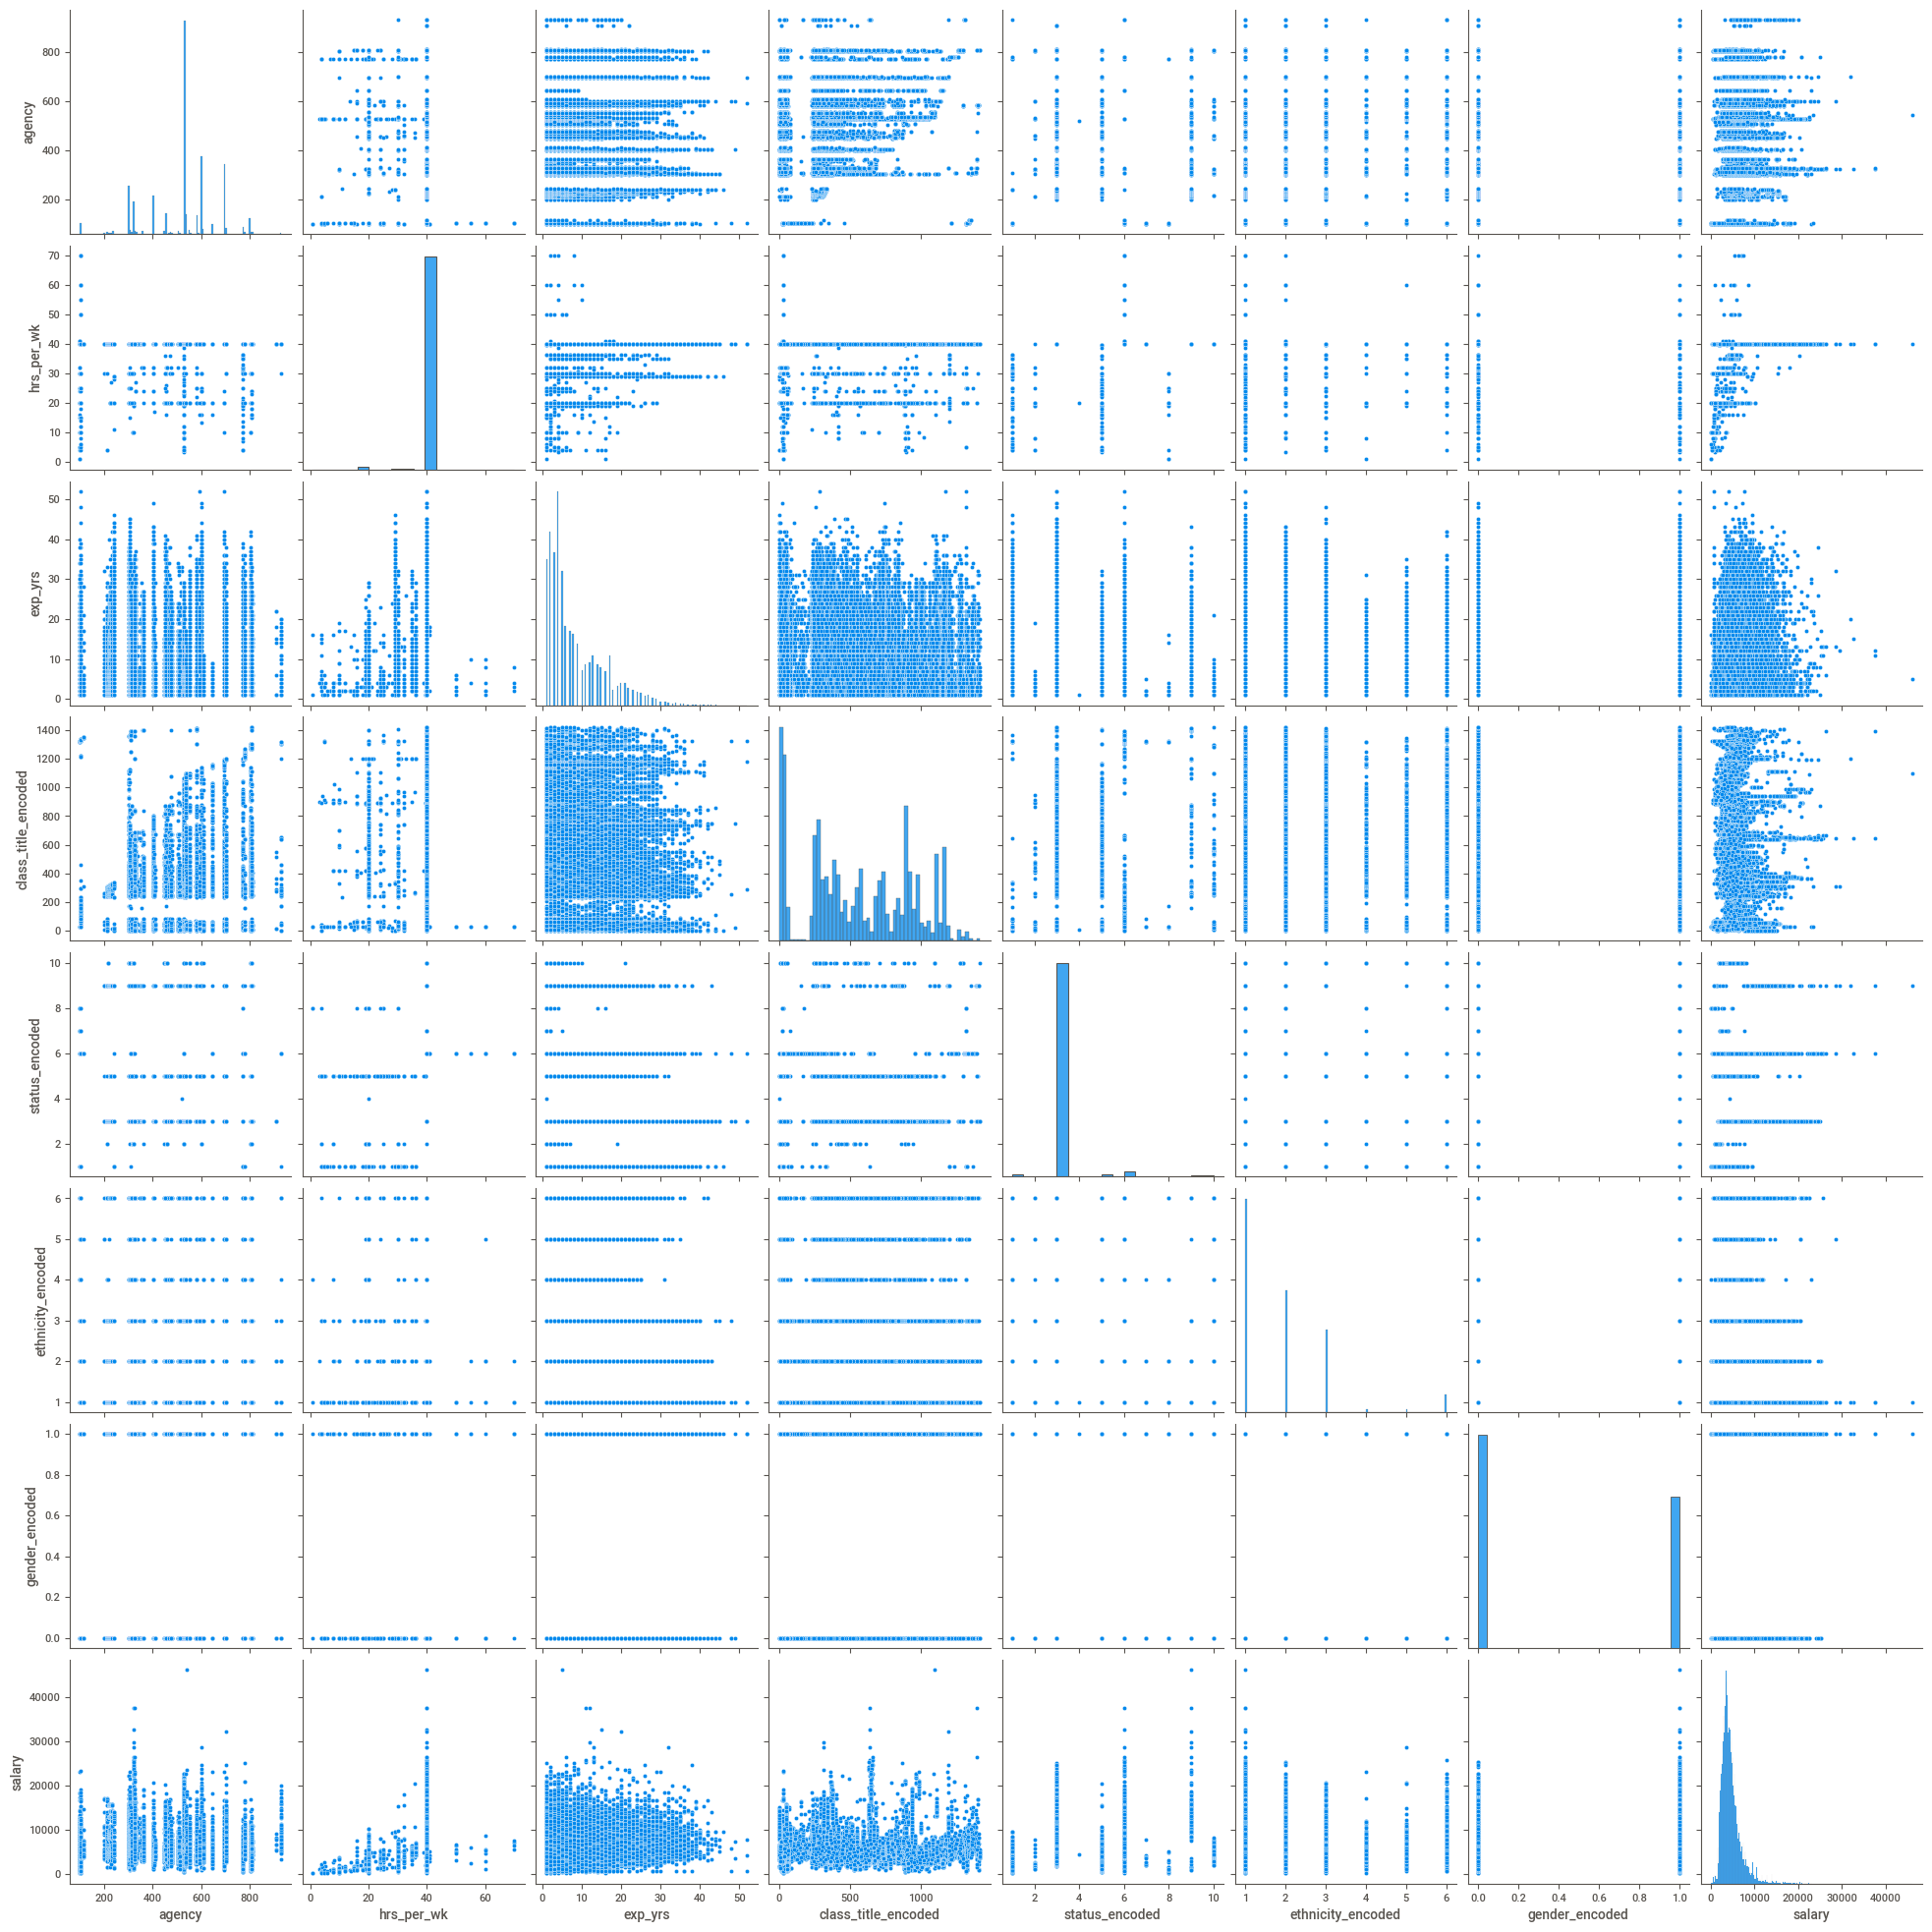

In [157]:
sns.pairplot(txsal_d)

In [158]:
txsal_d.columns

Index(['agency', 'ETHNICITY', 'GENDER', 'hrs_per_wk', 'exp_yrs',
       'class_title_encoded', 'status_encoded', 'ethnicity_encoded',
       'gender_encoded', 'salary'],
      dtype='object')

In [159]:
tx_cols=txsal_d[['agency','ETHNICITY','GENDER','hrs_per_wk', 'exp_yrs',
       'class_title_encoded', 'status_encoded','salary']]

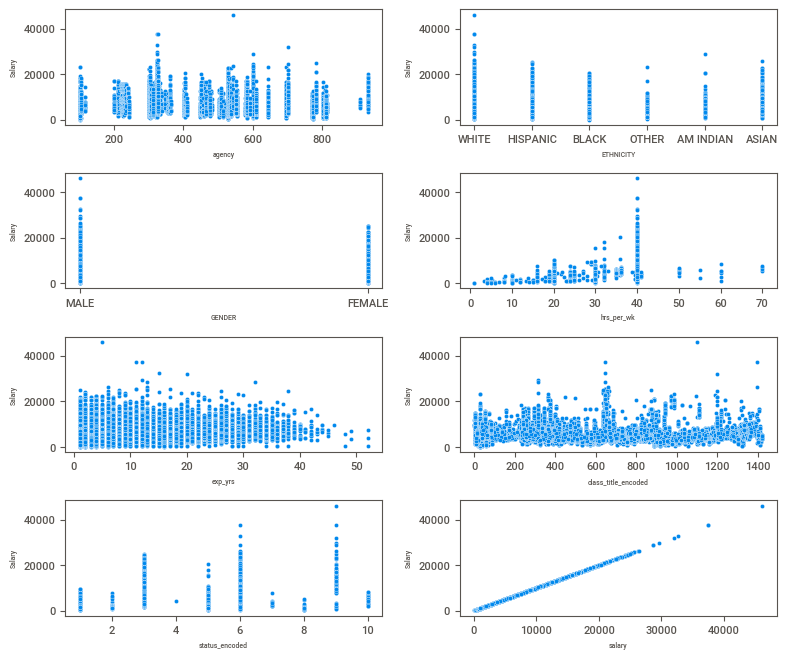

In [160]:
plt.figure(figsize=(8,8), facecolor='white')
pno=1
for i in tx_cols:
    ax = plt.subplot(5,2,pno)
    sns.scatterplot(x=txsal_d[i],y=txsal_d['salary'])
    plt.xlabel(i,fontsize=5)
    plt.ylabel('Salary',fontsize=5)
    pno += 1
plt.tight_layout()

### Insights (Bivariate)

<AxesSubplot:>

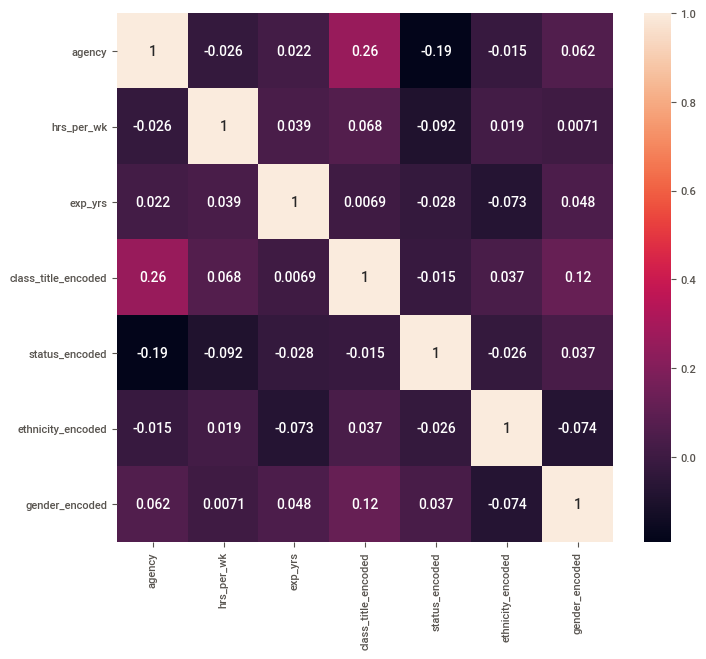

In [161]:
## Third step is Checking correlation i.e checking the linear relation between 2 variables.
plt.figure(figsize=(10-2,15-8), facecolor='white')
sns.heatmap(txsal_d.drop('salary',axis=1).corr(),annot=True)

## Data Preprocessing

In [162]:
txsal_1=txsal_d

In [163]:
txsal_1.isnull().sum()

agency                 0
ETHNICITY              0
GENDER                 0
hrs_per_wk             0
exp_yrs                0
class_title_encoded    0
status_encoded         0
ethnicity_encoded      0
gender_encoded         0
salary                 0
dtype: int64

# outlier treatment

In [164]:
txsal_1.shape

(97108, 10)

In [165]:
# creating new data frame txsal_1
taxsal_1 = txsal_d[['hrs_per_wk','exp_yrs','agency','class_title_encoded','ethnicity_encoded','gender_encoded','status_encoded','salary']]
taxsal_1

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary
0,29.0,33,241,1,1,1,1,9545.820312
1,4.0,6,212,2,1,1,2,1404.770020
2,29.0,1,241,1,1,1,1,9545.820312
3,4.0,3,212,2,1,1,2,1404.770020
4,40.0,1,696,3,2,0,3,3284.270020
...,...,...,...,...,...,...,...,...
149476,40.0,3,809,416,1,1,3,2899.000000
149477,40.0,6,809,445,1,0,3,5500.000000
149478,20.0,8,809,61,1,1,5,1120.599976
149479,40.0,32,809,257,1,1,3,5744.160156


In [166]:
taxsal_2=taxsal_1[['hrs_per_wk','exp_yrs','agency','class_title_encoded','ethnicity_encoded','gender_encoded','status_encoded']]

### Using distribution plots

In [167]:
import warnings
warnings.filterwarnings('ignore')

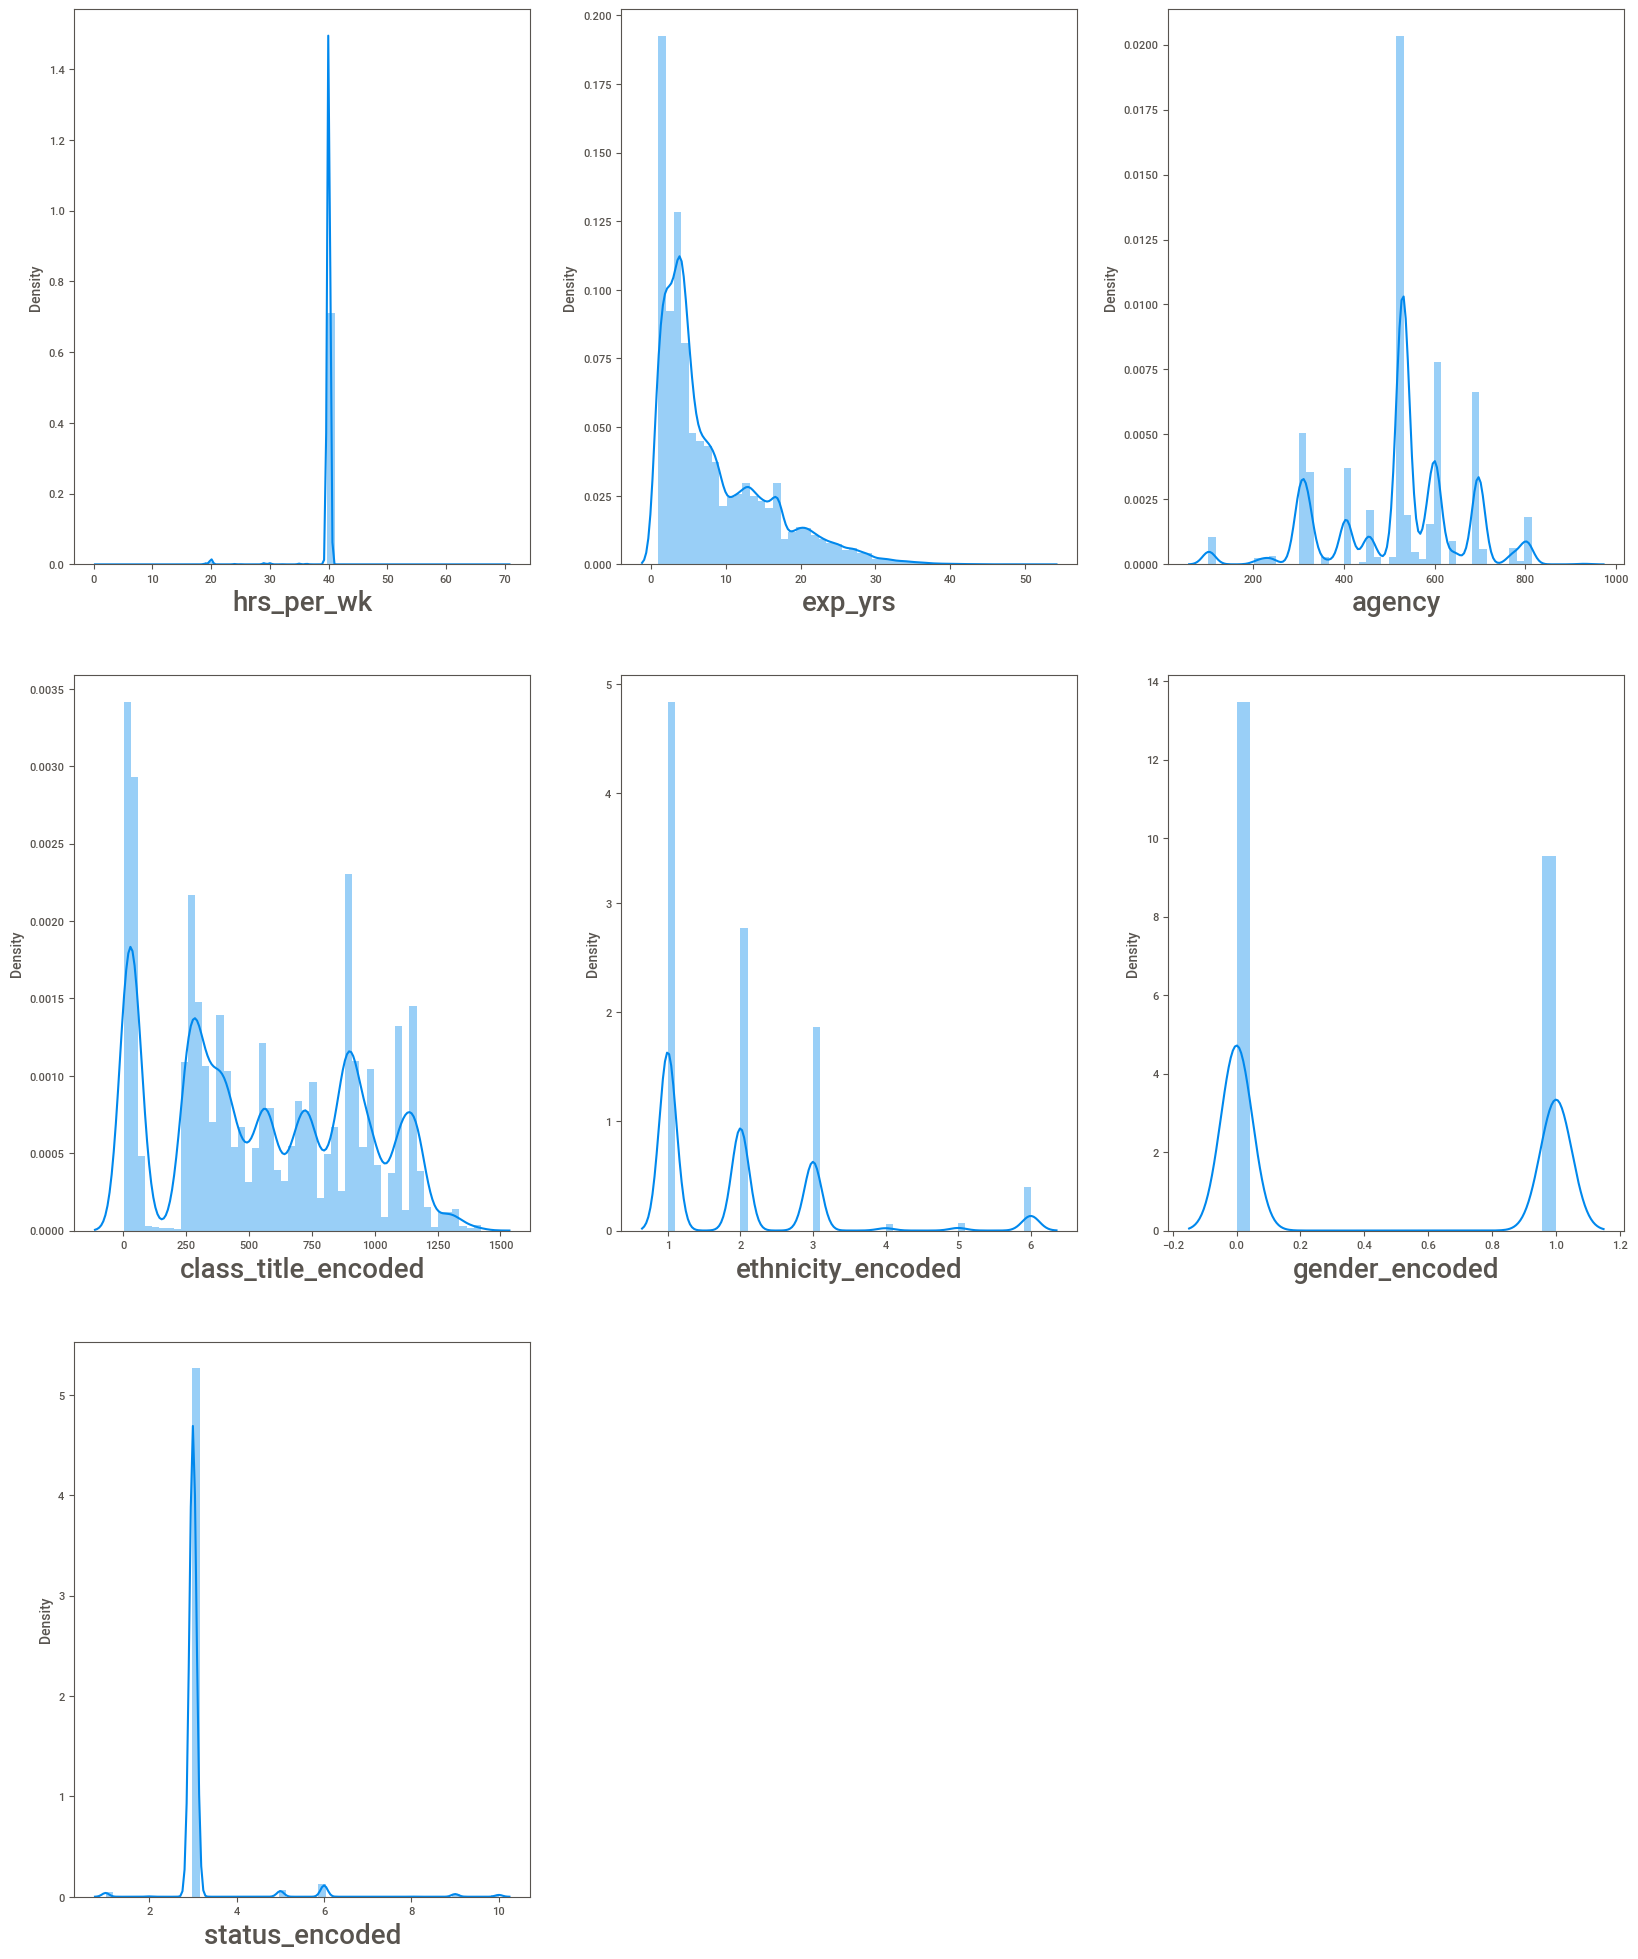

In [168]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in taxsal_2:
    if plotnumber<=10 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(taxsal_2[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

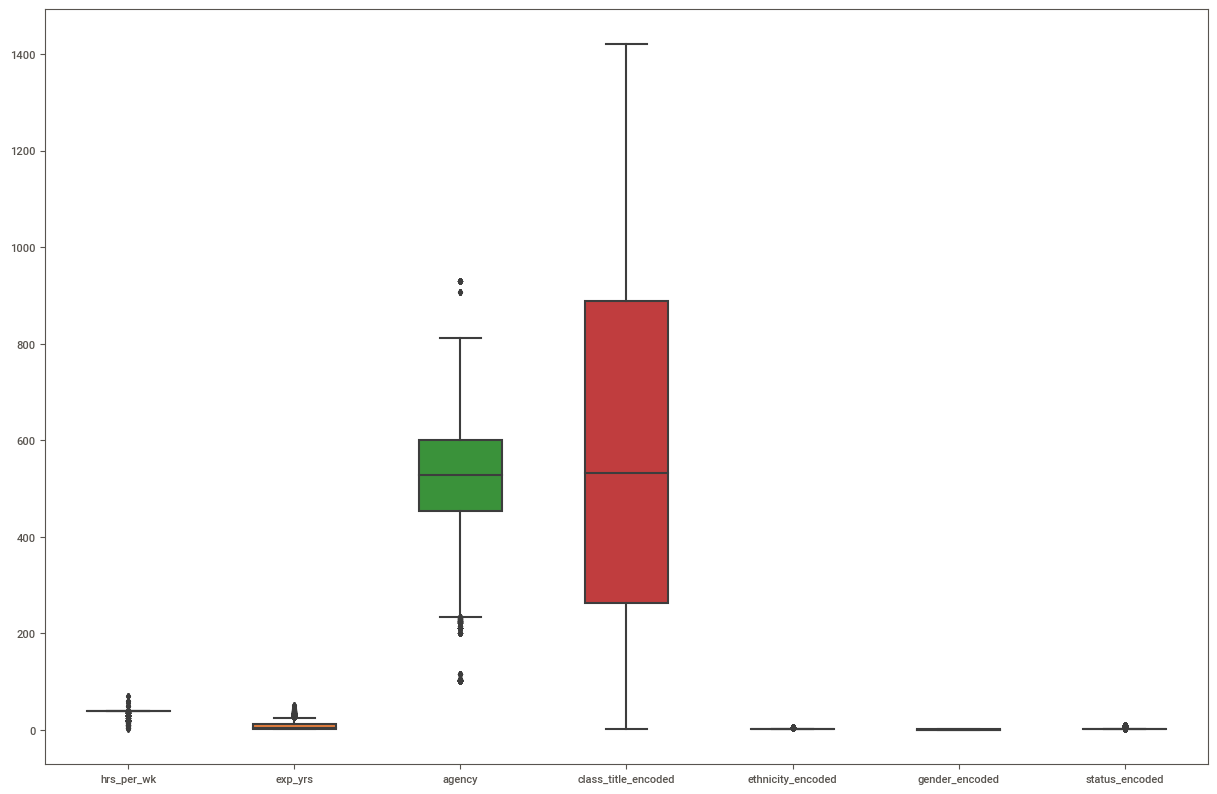

In [169]:
## checking the outliers for numeric features using boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=taxsal_2, width= 0.5,ax=ax,  fliersize=3)
plt.show()

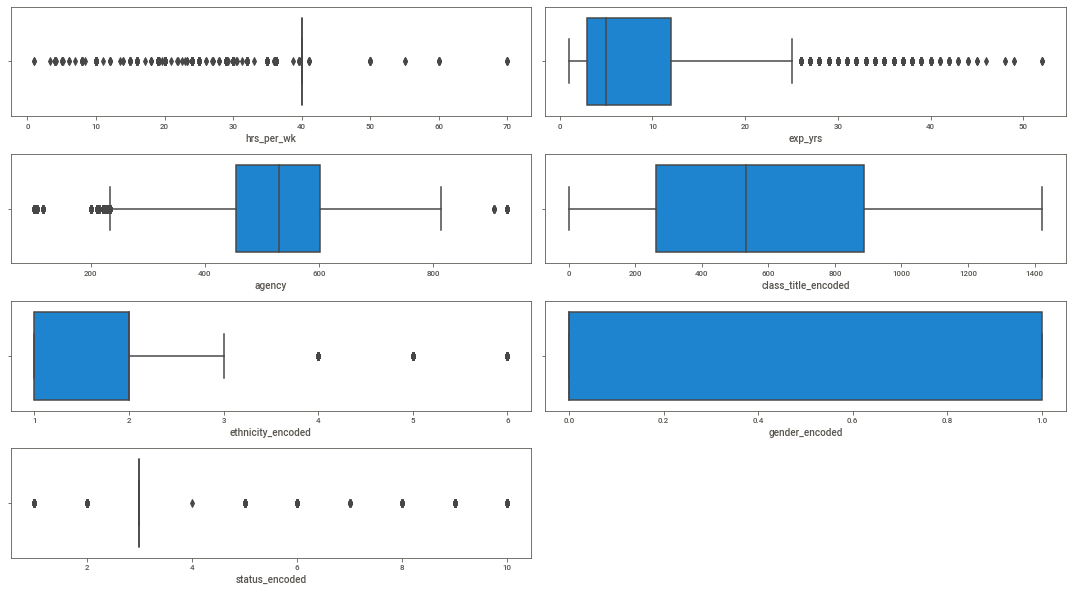

In [170]:
%matplotlib inline
plt.figure(figsize=(15,10), tight_layout=True)  
plotnumber=1
for column in taxsal_2:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber) 
        #plt.xlabel(column,fontsize = 5)   
        sns.boxplot(x=taxsal_1[column])
        plotnumber+=1

# Removing Outliers

In [171]:
taxsal_1.columns

Index(['hrs_per_wk', 'exp_yrs', 'agency', 'class_title_encoded',
       'ethnicity_encoded', 'gender_encoded', 'status_encoded', 'salary'],
      dtype='object')

In [172]:
taxsal_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97108 entries, 0 to 149480
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hrs_per_wk           97108 non-null  float32
 1   exp_yrs              97108 non-null  int32  
 2   agency               97108 non-null  int64  
 3   class_title_encoded  97108 non-null  int32  
 4   ethnicity_encoded    97108 non-null  int32  
 5   gender_encoded       97108 non-null  int32  
 6   status_encoded       97108 non-null  int32  
 7   salary               97108 non-null  float32
dtypes: float32(2), int32(5), int64(1)
memory usage: 4.1 MB


### Checking Outlier For The Feature "hrs_per_week"

<AxesSubplot:xlabel='hrs_per_wk', ylabel='Density'>

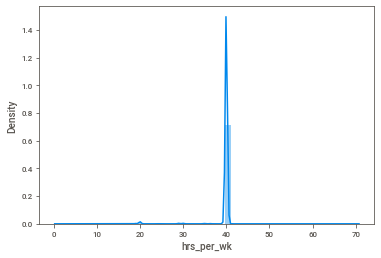

In [173]:
sns.distplot(taxsal_1.hrs_per_wk)

<AxesSubplot:xlabel='hrs_per_wk'>

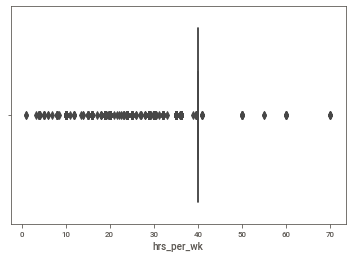

In [174]:
sns.boxplot(taxsal_1.hrs_per_wk)

### Removing Outlier For "hrs_per_wk" Feature Using IQR

In [175]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(taxsal_1['hrs_per_wk'], interpolation = 'midpoint') 

IQR

0.0

In [176]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = taxsal_1['hrs_per_wk'].quantile(0.25)
# Third quartile (Q3) 
Q3 = taxsal_1['hrs_per_wk'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [177]:
min_limit

40.0

In [178]:
#filtering the data
taxsal_1.loc[taxsal_1['hrs_per_wk']<min_limit]

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary
0,29.0,33,241,1,1,1,1,9545.820312
1,4.0,6,212,2,1,1,2,1404.770020
2,29.0,1,241,1,1,1,1,9545.820312
3,4.0,3,212,2,1,1,2,1404.770020
8,20.0,1,520,6,1,1,4,4281.950195
...,...,...,...,...,...,...,...,...
149462,30.0,19,809,61,3,0,5,1820.000000
149465,20.0,1,809,61,4,0,5,1040.000000
149468,20.0,3,809,61,1,0,5,1040.000000
149478,20.0,8,809,61,1,1,5,1120.599976


In [179]:
taxsal_1.loc[taxsal_1['hrs_per_wk'] < min_limit,'hrs_per_wk']=np.median(taxsal_1['hrs_per_wk'])

In [180]:
taxsal_1.loc[taxsal_1['hrs_per_wk']<min_limit]

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary


In [181]:
max_limit

40.0

In [182]:
taxsal_1.loc[taxsal_1['hrs_per_wk']>max_limit] #no out liers so leaving as it is

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary
37,41.0,2,101,29,2,0,6,2694.260010
53,41.0,16,101,27,1,0,6,4140.180176
56,41.0,18,101,29,1,1,6,4098.930176
63,41.0,18,101,29,2,0,6,3365.399902
78,41.0,17,101,29,1,1,6,5021.450195
80,50.0,2,102,31,1,1,6,3000.000000
81,60.0,10,102,31,2,0,6,922.500000
82,55.0,10,102,31,2,1,6,2280.590088
83,60.0,8,102,31,1,0,6,5437.069824
84,50.0,1,102,31,1,0,6,6250.000000


In [183]:
taxsal_1.loc[taxsal_1['hrs_per_wk'] > max_limit,'hrs_per_wk']=np.median(taxsal_1['hrs_per_wk'])

In [184]:
taxsal_1.loc[taxsal_1['hrs_per_wk']>max_limit]

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary


<AxesSubplot:xlabel='hrs_per_wk'>

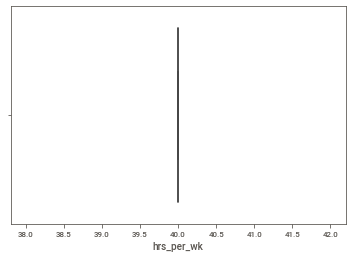

In [185]:
sns.boxplot(taxsal_1.hrs_per_wk) #outliers got removed

## EXP_YRS

<AxesSubplot:xlabel='exp_yrs', ylabel='Density'>

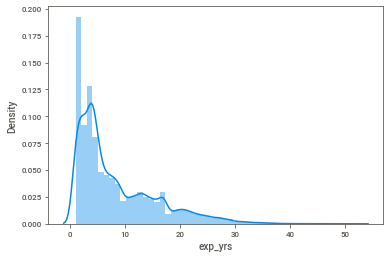

In [186]:
sns.distplot(taxsal_1.exp_yrs)

<AxesSubplot:xlabel='exp_yrs'>

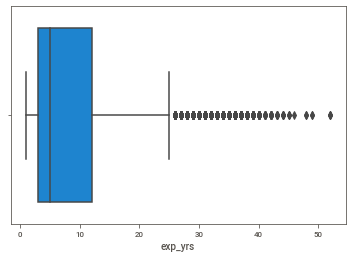

In [187]:
sns.boxplot(taxsal_1.exp_yrs)

### Removing Outlier For "exp_yrs" Feature Using IQR

In [188]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(taxsal_1['exp_yrs'], interpolation = 'midpoint') 

IQR

9.0

In [189]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = taxsal_1['exp_yrs'].quantile(0.25)
# Third quartile (Q3) 
Q3 = taxsal_1['exp_yrs'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [190]:
min_limit

-10.5

In [191]:
#filtering the data
taxsal_1.loc[taxsal_1['exp_yrs']<min_limit]

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary


In [192]:
max_limit

25.5

In [193]:
taxsal_1.loc[taxsal_1['exp_yrs']>max_limit]

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary
0,40.0,33,241,1,1,1,1,9545.820312
152,40.0,39,103,73,1,1,6,14985.500000
168,40.0,35,103,87,2,0,6,3226.399902
180,40.0,30,103,96,1,1,6,4730.370117
185,40.0,26,103,99,1,1,6,7282.620117
...,...,...,...,...,...,...,...,...
149245,40.0,26,808,365,1,0,3,7720.029785
149335,40.0,26,809,240,1,0,3,10721.969727
149345,40.0,33,809,54,1,0,3,9141.709961
149359,40.0,29,809,240,1,0,3,10734.719727


In [194]:
taxsal_1.loc[taxsal_1['exp_yrs'] > max_limit,'exp_yrs']=np.mean(taxsal_1['exp_yrs'])

In [195]:
#taxsal_1.loc[taxsal_1['exp_yrs'] > max_limit,'exp_yrs']=np.median(taxsal_1['exp_yrs'])

In [196]:
taxsal_1.loc[taxsal_1['exp_yrs']>max_limit]

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary


In [197]:
taxsal_1.loc[taxsal_1['exp_yrs']>max_limit]

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary


<AxesSubplot:xlabel='agency', ylabel='Density'>

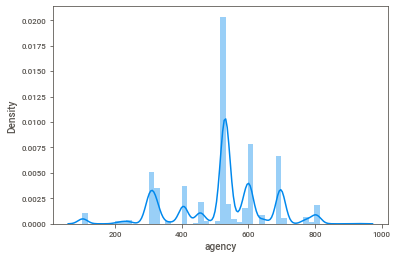

In [198]:
sns.distplot(taxsal_1.agency)

### Removing Outlier For "AGENCY" Feature Using IQR

In [199]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(taxsal_1['agency'], interpolation = 'midpoint') 

IQR

147.0

In [200]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = taxsal_1['agency'].quantile(0.25)
# Third quartile (Q3) 
Q3 = taxsal_1['agency'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [201]:
min_limit

233.5

In [202]:
#filtering the data
taxsal_1.loc[taxsal_1['agency']<min_limit]  

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary
1,40.0,6.0,212,2,1,1,2,1404.770020
3,40.0,3.0,212,2,1,1,2,1404.770020
34,40.0,5.0,101,27,1,0,6,6500.000000
35,40.0,2.0,101,27,1,1,6,6666.669922
36,40.0,11.0,101,28,1,0,6,8000.000000
...,...,...,...,...,...,...,...,...
142638,40.0,2.0,116,1345,1,0,6,4333.330078
142639,40.0,2.0,116,1345,1,0,6,3916.659912
142640,40.0,21.0,116,1346,1,0,6,9922.830078
142642,40.0,4.0,116,1354,3,0,6,6883.330078


In [203]:
taxsal_1.loc[taxsal_1['agency'] < min_limit,'agency']=np.mean(taxsal_1['agency'])

In [204]:
taxsal_1.loc[taxsal_1['agency']<min_limit]

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary


In [205]:
max_limit

821.5

In [206]:
taxsal_1.loc[taxsal_1['agency']>max_limit] 

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary
141209,40.0,22.0,907.0,291,1,0,3,7947.959961
141210,40.0,1.0,907.0,16,1,1,3,6500.000000
141211,40.0,14.0,907.0,273,2,0,3,5416.680176
141212,40.0,1.0,907.0,16,3,0,3,6500.000000
141213,40.0,22.0,907.0,329,2,0,3,5147.770020
...,...,...,...,...,...,...,...,...
141282,40.0,20.0,930.0,647,2,1,6,18102.150391
141283,40.0,7.0,930.0,651,1,1,6,14445.849609
141285,40.0,14.0,930.0,641,1,0,6,11014.639648
141286,40.0,5.0,930.0,641,6,1,6,8334.360352


In [207]:
taxsal_1.loc[taxsal_1['agency'] > max_limit,'agency']=np.median(taxsal_1['agency'])

In [208]:
#sns.boxplot(taxsal_1.agency)

In [209]:
# class_title_encoded,ethnicity_encoded,gender_encoded,class_title encoded are categorical features.
# so outliers treatment is not required.

In [210]:
taxsal_1.tail(2)

,hrs_per_wk,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary
149479,40.0,8.318934,809.0,257,1,1,3,5744.160156
149480,40.0,9.000000,809.0,61,1,0,5,1017.460022


In [211]:
# round exp_yrs to have 2 decimals
taxsal_1['exp_yrs']=round(taxsal_1['exp_yrs'],2)

In [212]:
taxsal_1.salary.min()

50.0

In [213]:
taxsal_1.salary.max()

46125.0

In [214]:
taxsal_1.salary.mean()

4604.1279296875

In [215]:
taxsal_1['salary']   =taxsal_1['salary'].astype(np.int32)

### Drop hrs_per_wk

In [216]:
#since this feature contains unique value of 40 for all the rows, we have dropped it.
taxsal_1.drop(columns='hrs_per_wk', axis=1, inplace=True)

In [217]:
taxsal_1.tail(2)

,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary
149479,8.32,809.0,257,1,1,3,5744
149480,9.00,809.0,61,1,0,5,1017


In [218]:
taxsal_1.shape

(97108, 7)

In [219]:
# concatenate the Agency and Title so that we have the value in single feature
taxsal_1['agency_title_merged']=taxsal_1['agency']+taxsal_1['class_title_encoded']

In [220]:
taxsal_1.tail(2)

,exp_yrs,agency,class_title_encoded,ethnicity_encoded,gender_encoded,status_encoded,salary,agency_title_merged
149479,8.32,809.0,257,1,1,3,5744,1066.0
149480,9.00,809.0,61,1,0,5,1017,870.0


In [221]:
# drop the agency and title as we concatenated it above to be a single feature
taxsal_1.drop(columns=['agency','class_title_encoded'], axis=1, inplace=True)

In [222]:
taxsal_1.tail(2)

,exp_yrs,ethnicity_encoded,gender_encoded,status_encoded,salary,agency_title_merged
149479,8.32,1,1,3,5744,1066.0
149480,9.00,1,0,5,1017,870.0


In [223]:
taxsal_2=taxsal_1[['exp_yrs','ethnicity_encoded','gender_encoded','status_encoded','agency_title_merged','salary']]

In [224]:
# swapping the features
taxsal_1=taxsal_2

In [225]:
taxsal_1.tail(2)

,exp_yrs,ethnicity_encoded,gender_encoded,status_encoded,agency_title_merged,salary
149479,8.32,1,1,3,1066.0,5744
149480,9.00,1,0,5,870.0,1017


In [226]:
taxsal_1.ethnicity_encoded.unique()

array([1, 2, 3, 4, 5, 6])

In [227]:
#ethnicity = pd.get_dummies(taxsal_1['ethnicity_encoded'], drop_first=True)

In [228]:
taxsal_1.gender_encoded.unique()

array([1, 0])

In [229]:
taxsal_1.status_encoded.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Model Creation

### Method to create models: 
Since we are predicting a continuous variable, we will be needing to fit a Linear Regression model for employing the same to prediction.
We will use R2 Score and Adjusted R2 Score (also train and test scores) for evaluation. However, for evaluating all the models, we will use Cross Validation (CV) scores as we do not have R2 score metric in all the algos and also since we have bulk data.

### Load sklearn libraries

In [230]:
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# from xgboost import XGBRegressor

In [231]:
taxsal_1

,exp_yrs,ethnicity_encoded,gender_encoded,status_encoded,agency_title_merged,salary
0,8.32,1,1,1,242.000000,9545
1,6.00,1,1,2,521.969302,1404
2,1.00,1,1,1,242.000000,9545
3,3.00,1,1,2,521.969302,1404
4,1.00,2,0,3,699.000000,3284
...,...,...,...,...,...,...
149476,3.00,1,1,3,1225.000000,2899
149477,6.00,1,0,3,1254.000000,5500
149478,8.00,1,1,5,870.000000,1120
149479,8.32,1,1,3,1066.000000,5744


In [232]:
taxsal_1.tail(2)

,exp_yrs,ethnicity_encoded,gender_encoded,status_encoded,agency_title_merged,salary
149479,8.32,1,1,3,1066.0,5744
149480,9.00,1,0,5,870.0,1017


In [233]:
## Definig independent and dependent variables
X=taxsal_1.iloc[:,0:-1]
y=taxsal_1.salary

In [234]:
lscore=[]

In [235]:
## scaling data
#standardscalar -- scales the data to a relatively normal distribution
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scale=MinMaxScaler()
scale = StandardScaler()
X_scaled=scale.fit_transform(X)

In [236]:
X_scaled

array([[ 0.11252631, -0.76120918,  1.18886526, -2.66336074, -1.96005321],
       [-0.27370931, -0.76120918,  1.18886526, -1.41574911, -1.30419175],
       [-1.10611367, -0.76120918,  1.18886526, -2.66336074, -1.96005321],
       ...,
       [ 0.05925243, -0.76120918,  1.18886526,  2.3270858 , -0.48888836],
       [ 0.11252631, -0.76120918,  1.18886526, -0.16813747, -0.029735  ],
       [ 0.2257333 , -0.76120918, -0.84113821,  2.3270858 , -0.48888836]])

In [237]:
## Definiging training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=42)

In [238]:
X_test.shape

(19422, 5)

In [239]:
y_test.shape

(19422,)

In [240]:
X_train.shape

(77686, 5)

In [241]:
y_train.shape

(77686,)

#### Evaluation Metrics: r2_Score (R2)
#### Best R2 score is 1.0 and can be -ve that means model is worse. (Range is 1 to -n)

## Linear Regression

In [242]:
## Model creation
from sklearn.linear_model import LinearRegression ## importing the model library 

LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data. It means creating the target function

y_hat=LR.predict(X_test) ## prediciton from model

In [243]:
y_hat

array([4174.16035003, 3964.19053809, 5085.95840733, ..., 4445.45252143,
       4938.08514363, 3372.90662687])

In [244]:
## Model Evaluation
##prediciton on training data
y_train_pred=LR.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_pred)
train_score

0.124520851820065

In [245]:
test_score=r2_score(y_test,y_hat)
test_score

0.1321798274989766

In [246]:
X_train.shape,X_test.shape

((77686, 5), (19422, 5))

In [247]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-train_score)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
train_adjusted_r2

0.12446450017561461

In [248]:
test_adjusted_r2= 1-(1-test_score)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
test_adjusted_r2

0.1319563468200261

In [249]:
print('intercept:', LR.intercept_) ## c value

intercept: 4609.2095531178475


In [250]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5,m6

slope: [ 414.22500042  -94.58628132  333.27862821  322.75581192 -525.19396602]


### Linear regression revisited with k-Fold Cross Validation

In [251]:
#import libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

In [252]:
# k-fold CV 
lm = LinearRegression()

In [253]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.12559644, 0.13281535, 0.11585752, 0.11771826, 0.1167888 ,
       0.12777604, 0.12183464, 0.11864981, 0.14426397, 0.11964121])

In [254]:
# we can also tune with other metrics such as mse, rmse , etc...
# scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
#scores

In [255]:
X_train[1]

array([-0.77315193, -0.76120918, -0.84113821, -0.16813747,  0.90262744])

In [256]:
# cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)


In [257]:
# range of hyperparameters to tune

# we have 5 features ....

hyper_params = [{'n_features_to_select': list(range(1, 6))}]

In [258]:
# grid search
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

In [259]:
#GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [260]:
# fit the model
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [261]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015527,0.001015,0.000399,0.000489,1,{'n_features_to_select': 1},0.047001,0.041858,0.045438,0.045890,0.043355,0.044708,0.001852,5,0.044128,0.045435,0.044501,0.044387,0.045015,0.044693,0.000470
1,0.009372,0.007652,0.000000,0.000000,2,{'n_features_to_select': 2},0.080138,0.071888,0.083423,0.077362,0.080359,0.078634,0.003880,4,0.078212,0.080365,0.077388,0.078894,0.078146,0.078601,0.001003
2,0.016647,0.003551,0.000399,0.000489,3,{'n_features_to_select': 3},0.103742,0.097293,0.107086,0.101692,0.102509,0.102464,0.003173,3,0.102134,0.103808,0.101299,0.102639,0.102427,0.102461,0.000813
3,0.007982,0.004040,0.000399,0.000489,4,{'n_features_to_select': 4},0.127199,0.116138,0.121178,0.118997,0.130038,0.122710,0.005161,2,0.121734,0.124557,0.123169,0.123735,0.120946,0.122828,0.001317
4,0.009379,0.007658,0.000000,0.000000,5,{'n_features_to_select': 5},0.129314,0.116843,0.122547,0.120322,0.132925,0.124390,0.005899,1,0.123357,0.126536,0.124972,0.125550,0.122353,0.124554,0.001508


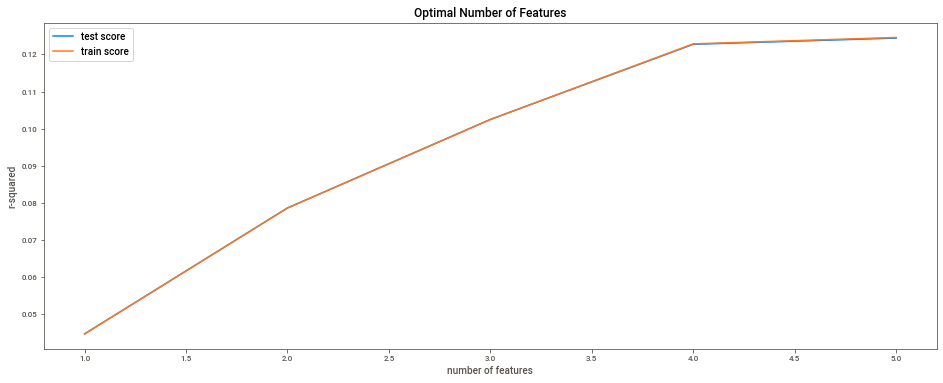

In [262]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [263]:
import sklearn

In [264]:
# final model
n_features_optimal =5

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict X_test salary
y_pred = lm.predict(X_test)
cv_r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(cv_r2)

0.1321798274989766


In [265]:
lscore.append(['Linear regression',train_score, test_score, train_adjusted_r2,test_adjusted_r2,cv_r2])

### Decision Tree

In [266]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print('Decisiontree Regressor - train :',model.score(X_train,y_train)*100)
print('Decisiontree Regressor - test :',model.score(X_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

Decisiontree Regressor - train : 91.4660724456656
Decisiontree Regressor - test : 40.267479971149086
Mena Squard Error IS :      2973443.3610682418
Mean Absolute Error Is :    870.8565255685006
Median Absolute Error Is :  306.0


In [267]:
from sklearn.metrics import precision_recall_curve,r2_score,confusion_matrix,classification_report

In [268]:
y_train_pred=model.predict(X_train)
train_score=r2_score(y_train,y_train_pred)
train_score

0.914660724456656

In [269]:
test_r2score =  r2_score(y_test,y_predict)
print(test_r2score)

0.4026747997114909


In [270]:
train_adjusted_r2 = 1-(1-train_score)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
train_adjusted_r2

0.9146552314548831

In [271]:
test_adjusted_r2= 1-(1-test_score)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
test_adjusted_r2

0.1319563468200261

### Decision Tree revisited with CV

In [272]:
# k-fold CV 
model = DecisionTreeRegressor()

In [273]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [274]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.38853328, 0.36004798, 0.39717861, 0.37235741, 0.33882332])

In [275]:
#range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]

In [276]:
#
#lm = LinearRegression()
model.fit(X_train, y_train)
rfe = RFE(model)


In [277]:
# GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [278]:
# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [279]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.378193,0.006538,0.000000,0.000000,1,{'n_features_to_select': 1},0.516489,0.497128,0.517614,0.507145,0.514535,0.510582,0.007652,1,0.567846,0.570504,0.569389,0.571108,0.566793,0.569128,0.001611
1,0.328051,0.000003,0.000000,0.000000,2,{'n_features_to_select': 2},0.399949,0.395672,0.416150,0.362669,0.388196,0.392527,0.017512,4,0.777422,0.779849,0.775686,0.783492,0.778303,0.778950,0.002640
2,0.262442,0.011689,0.009372,0.007652,3,{'n_features_to_select': 3},0.482563,0.517749,0.494018,0.502495,0.498733,0.499112,0.011478,2,0.824841,0.824908,0.825096,0.827053,0.821607,0.824701,0.001750
3,0.199957,0.006251,0.000000,0.000000,4,{'n_features_to_select': 4},0.426603,0.432142,0.414789,0.404855,0.403636,0.416405,0.011408,3,0.885537,0.886850,0.887544,0.890149,0.886117,0.887239,0.001604
4,0.099982,0.007653,0.006247,0.007651,5,{'n_features_to_select': 5},0.378920,0.351509,0.401357,0.363821,0.346367,0.368395,0.019943,5,0.922739,0.925412,0.922794,0.926493,0.923531,0.924194,0.001502


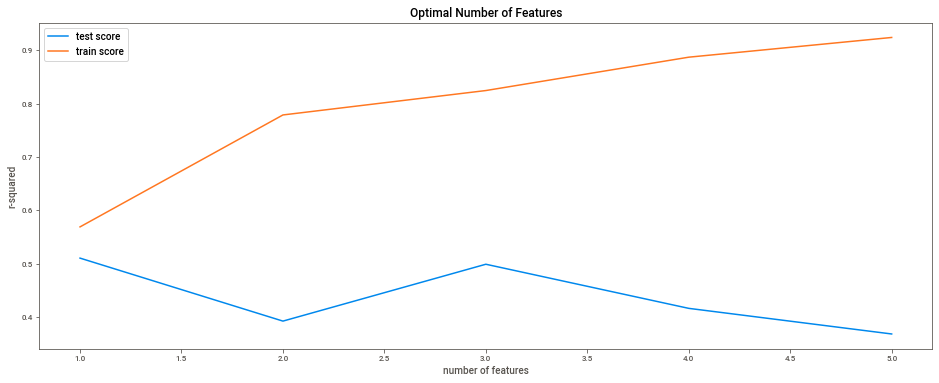

In [280]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [281]:
# final model
n_features_optimal = 5

#lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
cv_r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(cv_r2)

0.1321798274989766


In [282]:
lscore.append(['Decision Tree',train_score, test_score, train_adjusted_r2,test_adjusted_r2,cv_r2])

# Knn

In [283]:
model=KNeighborsRegressor(leaf_size=8,metric= 'minkowski',n_neighbors=25,weights='uniform')
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
print('KNeighborsRegressor',model.score(X_train,y_train)*100)
print('KNeighborsRegressor',model.score(X_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_hat))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_hat))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_hat))

KNeighborsRegressor 36.645244814298735
KNeighborsRegressor 32.7909116359471
Mean Squard Error IS :      3345621.740100999
Mean Absolute Error Is :    1196.8408835341363
Median Absolute Error Is :  790.6400000000003


In [284]:
y_train_pred = model.predict(X_train)

In [285]:
train_score=r2_score(y_train,y_train_pred)
train_score

0.3664524481429874

In [286]:
test_r2score =  r2_score(y_test,y_predict)
print(test_r2score)

0.4026747997114909


In [287]:
train_adjusted_r2 = 1-(1-train_score)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
train_adjusted_r2

0.36641166882064846

In [288]:
test_adjusted_r2= 1-(1-test_score)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
test_adjusted_r2

0.1319563468200261

### kNN revisited with CV

In [289]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
scores     

array([0.29947318, 0.32127739, 0.29267203, 0.29100813, 0.31064907])

In [290]:
# can tune other metrics
#scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
#scores

In [291]:
# cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)


In [292]:
# specify params
hyper_params = [{'n_features_to_select': list(range(1, 6))}]

In [293]:
# perform grid search
#fit model
model.fit(X_train, y_train)
rfe = RFE(model)             

In [294]:
# GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [295]:
model_cv.fit(X_train, y_train)      

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=KNeighborsRegressor(leaf_size=8,
                                                         n_neighbors=25)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [296]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.033363,0.022971,0.000000,0.000000,1,{'n_features_to_select': 1},NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.966654,0.010405,0.000000,0.000000,2,{'n_features_to_select': 2},NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.988031,0.019815,0.000000,0.000000,3,{'n_features_to_select': 3},NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.002669,0.022970,0.000000,0.000000,4,{'n_features_to_select': 4},NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.972140,0.018760,0.560325,0.007123,5,{'n_features_to_select': 5},0.303411,0.292276,0.314598,0.288383,0.309908,0.301715,0.010028,1,0.354462,0.358792,0.353935,0.360926,0.354066,0.356436,0.00288


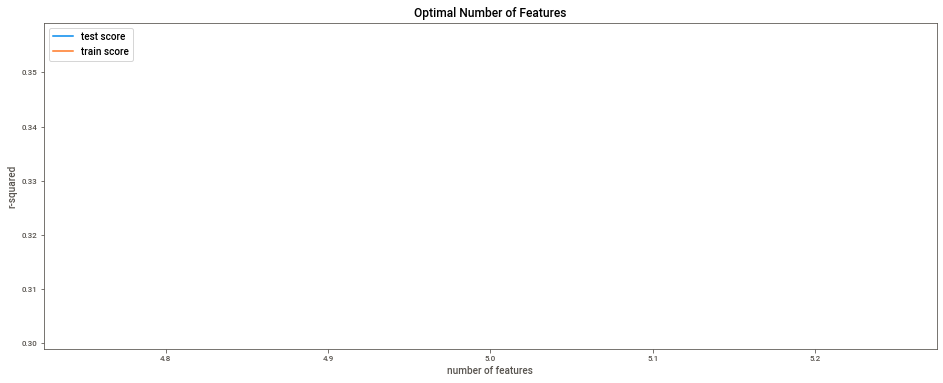

In [297]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [298]:
# final model
n_features_optimal = 5
knn = KNeighborsRegressor(n_neighbors=9) # we can take n=7
knn.fit(X_train, y_train)

rfe = RFE(knn, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict salary of X_test
y_pred = knn.predict(X_test)
cv_r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(cv_r2)

0.35145319841449385


In [299]:
lscore.append(['kNN',train_score, test_score, train_adjusted_r2,test_adjusted_r2,cv_r2])

### Random Forest

In [300]:
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
print('Random Forest',model.score(X_train,y_train)*100)
print('Random Forest',model.score(X_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_hat))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_hat))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_hat))

Random Forest 87.66857079155973
Random Forest 57.397052192922416
Mean Squard Error IS :      2120745.1528531904
Mean Absolute Error Is :    794.2889175639533
Median Absolute Error Is :  339.85496428571423


In [301]:
y_train_pred = model.predict(X_train)

In [302]:
test_score=r2_score(y_test,y_hat)
test_score

0.5739705219292242

In [303]:
train_score=r2_score(y_train,y_train_pred)
train_score

0.8766857079155973

In [304]:
train_adjusted_r2 = 1-(1-train_score)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
train_adjusted_r2

0.8766777705898967

In [305]:
test_adjusted_r2= 1-(1-test_score)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
test_adjusted_r2

0.5738608110005903

### Random Forest revisited with CV

In [306]:
model = RandomForestRegressor(random_state=42) 

In [307]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.55509929, 0.54379609, 0.56351529, 0.5436978 , 0.55052776])

In [308]:
#scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
#scores

In [309]:
# set the hyperparams, and fit model
hyper_params = [{'n_features_to_select': list(range(1, 6))}]
model.fit(X_train, y_train)
rfe = RFE(model)             

In [310]:
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [311]:
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor(random_state=42)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

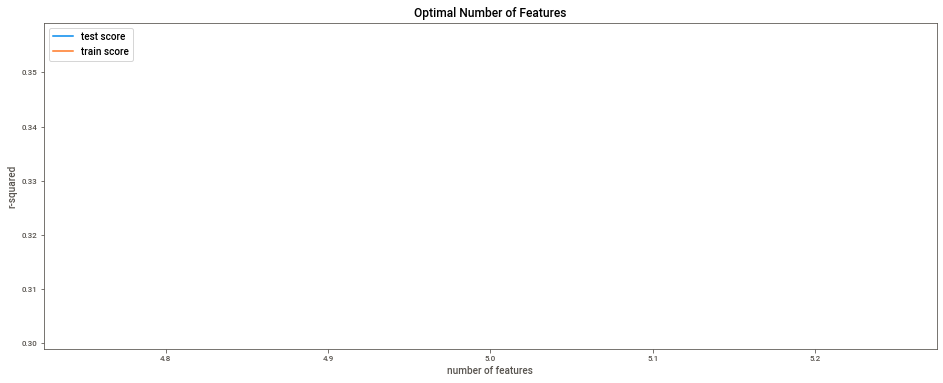

In [312]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [313]:
# The above chart is blank since cv_results are nulls... Need to delve into this why it is returning nulls in the long run.

model

RandomForestRegressor(random_state=42)

In [314]:
# rf regression model
n_features_optimal = 6

model.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = model.predict(X_test)
cv_r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(cv_r2)

0.5739705219292242


In [315]:
lscore.append(['Random Forest',train_score, test_score, train_adjusted_r2,test_adjusted_r2,cv_r2])

# Xg-boost

In [316]:
from xgboost import XGBRegressor 

In [317]:
model=XGBRegressor()
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
print('XGBRegressor',model.score(X_train,y_train)*100)
print('XGBRegressor',model.score(X_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_hat))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_hat))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_hat))

XGBRegressor 66.27956717275609
XGBRegressor 60.6454597096652
Mean Squard Error IS :      1959041.6827829892
Mean Absolute Error Is :    880.7740448142605
Median Absolute Error Is :  544.17724609375


In [318]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print('XGBRegressor',model.score(X_train,y_train)*100)
print('XGBRegressor',model.score(X_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_hat))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_hat))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_hat))



XGBRegressor 34.136622436166995
XGBRegressor 35.10254665551573
Mean Squard Error IS :      3230550.154324452
Mean Absolute Error Is :    1227.01651049989
Median Absolute Error Is :  913.9773879476072


In [319]:
y_train_pred = model.predict(X_train)

In [320]:
test_score=r2_score(y_test,y_hat)
test_score

0.3510254665551573

In [321]:
train_score=r2_score(y_train,y_train_pred)
train_score

0.34136622436166997

In [322]:
train_adjusted_r2 = 1-(1-train_score)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
train_adjusted_r2

0.34132383032358826

In [323]:
test_adjusted_r2= 1-(1-test_score)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
test_adjusted_r2

0.3508583429113984

### XG boost revisited with CV

In [324]:
model=GradientBoostingRegressor()   

In [325]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.34510854, 0.32557531, 0.34481195, 0.34037292, 0.33572017])

In [326]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-4505956.38468244, -4411911.53441739, -4494939.23615562,
       -4436500.5233122 , -4765313.1899666 ])

In [327]:
# Cross validation method
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [328]:
hyper_params = [{'n_features_to_select': list(range(1, 6))}]

In [329]:
model=GradientBoostingRegressor()   
model.fit(X_train, y_train)
rfe = RFE(model)

In [330]:
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)    

In [331]:
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=GradientBoostingRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [332]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.814946,0.040729,0.015623,0.000004,1,{'n_features_to_select': 1},0.252937,0.230916,0.244320,0.243144,0.235816,0.241427,0.007560,5,0.248846,0.246137,0.249814,0.250008,0.242746,0.247510,0.002754
1,6.097315,0.054001,0.012500,0.006250,2,{'n_features_to_select': 2},0.309599,0.287389,0.297665,0.297514,0.296690,0.297771,0.007056,4,0.299390,0.303126,0.308875,0.309242,0.299454,0.304018,0.004334
2,4.946059,0.025143,0.009372,0.007653,3,{'n_features_to_select': 3},0.324399,0.313468,0.310360,0.314712,0.319069,0.316402,0.004879,3,0.321140,0.328330,0.322804,0.327680,0.318413,0.323673,0.003810
3,3.521184,0.029498,0.015616,0.000012,4,{'n_features_to_select': 4},0.346103,0.332437,0.332970,0.331996,0.334774,0.335656,0.005308,2,0.345531,0.346861,0.340060,0.350157,0.340061,0.344534,0.003951
4,1.812687,0.014685,0.015624,0.000006,5,{'n_features_to_select': 5},0.345109,0.325575,0.344812,0.340371,0.335720,0.338317,0.007234,1,0.341469,0.346038,0.354033,0.353428,0.340658,0.347125,0.005700


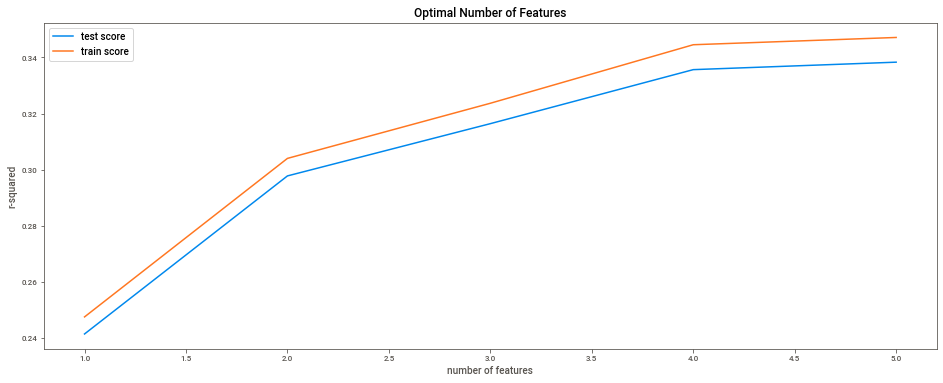

In [333]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [334]:
# model last
n_features_optimal = 6

model=GradientBoostingRegressor()   

model.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = model.predict(X_test)
cv_r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(cv_r2)

0.3510254665551573


## Conclusion

### Analyse tests/scores, select/finalize the model

In [335]:
lscore.append(['XG Boost',train_score, test_score, train_adjusted_r2,test_adjusted_r2,cv_r2])

In [336]:
res_df = pd.DataFrame(columns= ['Regressor/s','R2(Test)','R2(Train)','Adj-R2(Test)','Adj-R2(Train)','R2(CV)'], data=lscore)

In [337]:
res_df

,Regressor/s,R2(Test),R2(Train),Adj-R2(Test),Adj-R2(Train),R2(CV)
0,Linear regression,0.124521,0.132180,0.124465,0.131956,0.132180
1,Decision Tree,0.914661,0.132180,0.914655,0.131956,0.132180
2,kNN,0.366452,0.132180,0.366412,0.131956,0.351453
3,Random Forest,0.876686,0.573971,0.876678,0.573861,0.573971
4,XG Boost,0.341366,0.351025,0.341324,0.350858,0.351025


## Out of all the model evaluations shown above, the regresson algorithm - Random Forest  provides better prediction. Hence, we may employ this model in our future predictions.